In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [114]:
from sklearn.cluster import KMeans

In [115]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format',  '{:,}'.format)

# Data Read-In

In [116]:
header = ['esn','cycles','opset1','opset2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32', "blank1", "blank2"]


In [117]:
train_FD001 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD001.txt', sep = " ", header = 0, names = header)
train_FD001['dataset'] = "FD001"
train_FD002 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD002.txt', sep = " ", header = 0, names = header)
train_FD002['dataset'] = "FD002"
train_FD003 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD003.txt', sep = " ", header = 0, names = header)
train_FD003['dataset'] = "FD003"
train_FD004 = pd.read_csv(r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\train_FD004.txt', sep = " ", header = 0, names = header)
train_FD004['dataset'] = "FD004"

In [118]:
train = pd.concat([train_FD001, train_FD002, train_FD003, train_FD004], ignore_index=True)

In [119]:
train = train.drop(["blank1", "blank2"], axis = 1)

In [120]:
#two last columns are fully NaN >> they're to be dropped.
train.describe()

esn             cycles             opset1  \
count          160,355.0          160,355.0          160,355.0   
mean  105.55636556390509 123.33438932368807 17.211922257491192   
std      72.866362604896  83.53695309314152  16.52790707957651   
min                  1.0                1.0            -0.0087   
25%                 44.0               57.0             0.0013   
50%                 89.0              114.0            19.9981   
75%                164.0              173.0            35.0015   
max                260.0              543.0             42.008   

                  opset2                TRA                 T2  \
count          160,355.0          160,355.0          160,355.0   
mean  0.4100034111814411   95.7242368494902 485.84096224002985   
std   0.3679368490270224 12.359179910937495 30.420239839414275   
min              -0.0006               60.0              445.0   
25%               0.0002              100.0             449.44   
50%                 0.62              100.0             489.05   
75%                 0.84              100.0             518.67   
max                0.842              100.0             518.67   

                    T24                T30                 T50  \
count         160,355.0          160,355.0           160,355.0   
mean   597.361023416794 1,467.035610177419 1,260.9564107760907   
std   42.47845592923608 118.17526792883352  136.30005277905528   
min              535.48           1,242.67            1,023.77   
25%              549.96           1,357.36            1,126.83   
50%              605.93           1,492.81            1,271.74   
75%              642.34           1,586.59             1,402.2   
max              645.11           1,616.91            1,441.49   

                     P2                P15                P30  \
count         160,355.0          160,355.0          160,355.0   
mean  9.895005331919803 14.424940164011103  359.7299588413209   
std   4.265534609958304  6.443895976302771 174.13327950808818   
min                3.91               5.67             136.17   
25%                5.48                8.0             175.71   
50%                9.35              13.66             341.69   
75%               14.62              21.61             553.29   
max               14.62              21.61             570.81   

                       Nf                Nc                 epr  \
count           160,355.0         160,355.0           160,355.0   
mean  2,273.8289884942783 8,677.55337563531   1.153704717657697   
std    142.42767744112453 374.6577105081706 0.14210293430351725   
min              1,914.72          7,984.51                0.93   
25%              2,212.12          8,334.77                1.02   
50%              2,319.37           8,764.2                1.09   
75%              2,388.05          9,055.85                 1.3   
max              2,388.64          9,244.59                1.32   

                   Ps30                phi                NRf  \
count         160,355.0          160,355.0          160,355.0   
mean  44.21203922546849  338.7898102959059 2,349.644287861308   
std   3.426356419080013 164.19296351635052 111.16846432465698   
min               36.04             128.31           2,027.57   
25%               42.01             164.79           2,387.97   
50%               44.93             321.69           2,388.07   
75%               47.34             521.34           2,388.16   
max               48.53             537.49           2,390.49   

                      NRc                BPR                 farB  \
count           160,355.0          160,355.0            160,355.0   
mean  8,088.9506511178315   9.05475118767734  0.02518536996040037   
std     80.62397346405147 0.7515864047763415 0.004996578195980995   
min              7,845.78             8.1563                 0.02   
25%              8,070.53             8.4393                 0.02   
50%              8,118.59             9.0301  

Rozkłady sensorów ciągłych na datasecie per ESN

In [121]:
sensors = ['T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [122]:
train.head()

esn  cycles  opset1  opset2   TRA     T2    T24      T30      T50    P2  \
0    1       2  0.0019 -0.0003 100.0 518.67 642.15 1,591.82 1,403.14 14.62   
1    1       3 -0.0043  0.0003 100.0 518.67 642.35 1,587.99  1,404.2 14.62   
2    1       4  0.0007     0.0 100.0 518.67 642.35 1,582.79 1,401.87 14.62   
3    1       5 -0.0019 -0.0002 100.0 518.67 642.37 1,582.85 1,406.22 14.62   
4    1       6 -0.0043 -0.0001 100.0 518.67  642.1 1,584.47 1,398.37 14.62   

    P15    P30       Nf       Nc  epr  Ps30    phi      NRf      NRc    BPR  \
0 21.61 553.75 2,388.04 9,044.07  1.3 47.49 522.28 2,388.07 8,131.49 8.4318   
1 21.61 554.26 2,388.08 9,052.94  1.3 47.27 522.42 2,388.03 8,133.23 8.4178   
2 21.61 554.45 2,388.11 9,049.48  1.3 47.13 522.86 2,388.08 8,133.83 8.3682   
3 21.61  554.0 2,388.06 9,055.15  1.3 47.28 522.19 2,388.04  8,133.8 8.4294   
4 21.61 554.67 2,388.02 9,049.68  1.3 47.16 521.68 2,388.03 8,132.85 8.4108   

   farB  htBleed  Nf_dmd  PCNfR_dmd   W31     W32 dataset  
0  0.03      392    2388      100.0  39.0 23.4236   FD001  
1  0.03      390    2388      100.0 38.95 23.3442   FD001  
2  0.03      392    2388      100.0 38.88 23.3739   FD001  
3  0.03      393    2388      100.0  38.9 23.4044   FD001  
4  0.03      391    2388      100.0 38.98 23.3669   FD001

na wykresie sensor 4 mamy 5 górek, tzn, ze występują podpopulacje w obrębie datasetów.
1. Ktore ze zmiennych floatowych mają dużą zmienność a które są w zasadzie nakładką na kategoryczne? (szerokie zakresy vs. pionowe słupki dla jednej wartości) - chcemy brać te zmienne, które

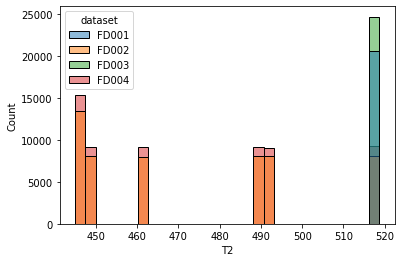

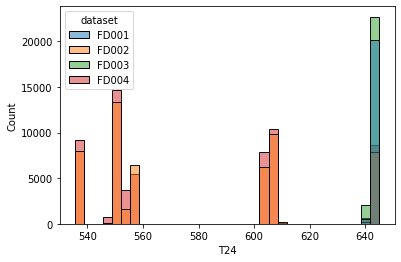

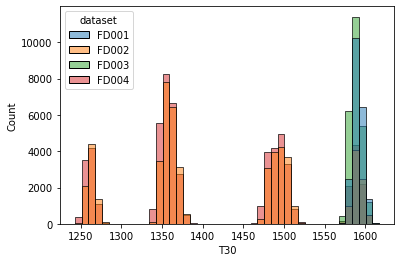

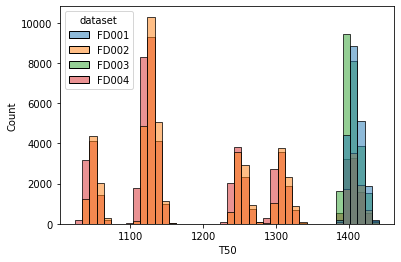

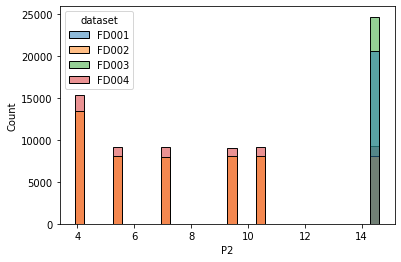

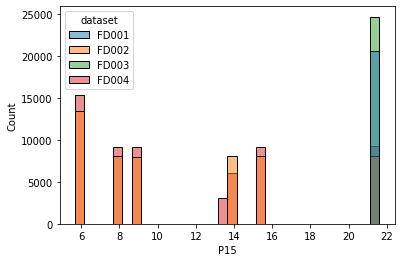

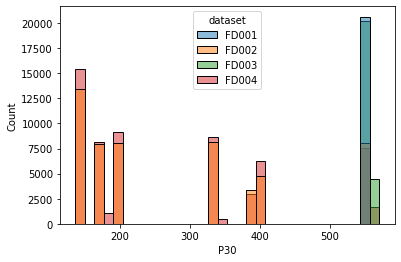

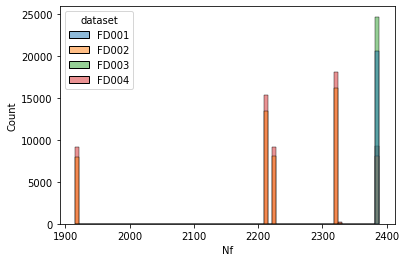

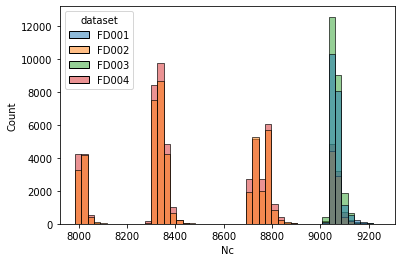

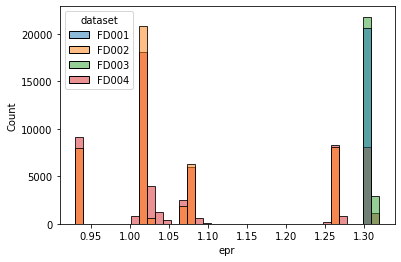

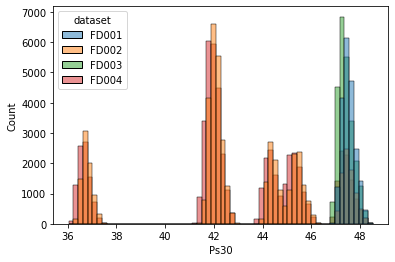

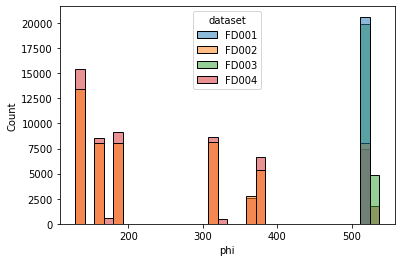

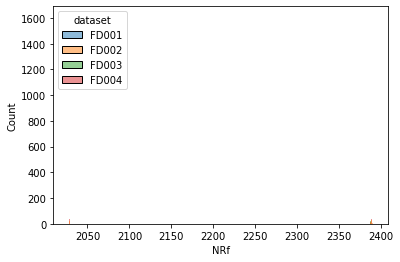

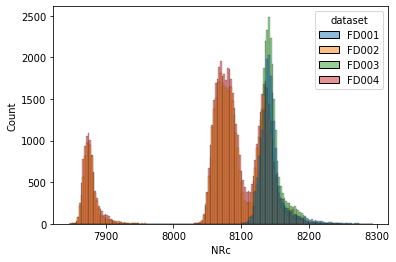

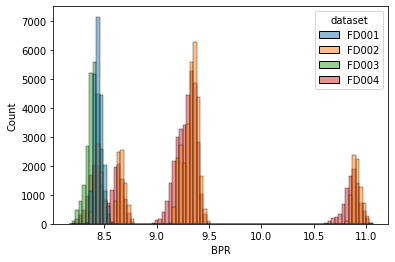

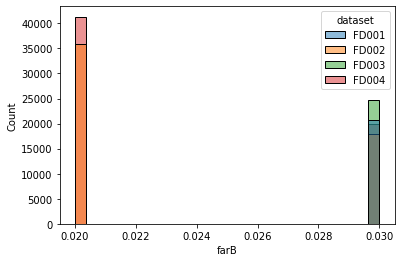

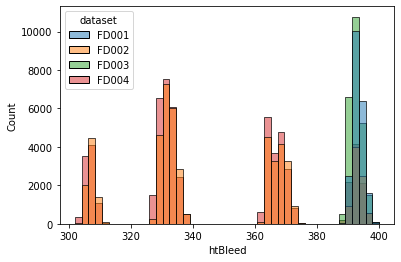

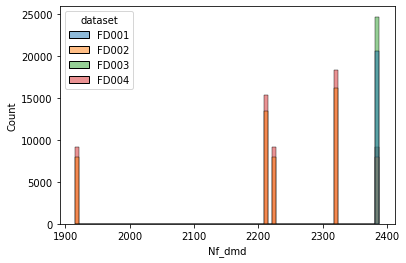

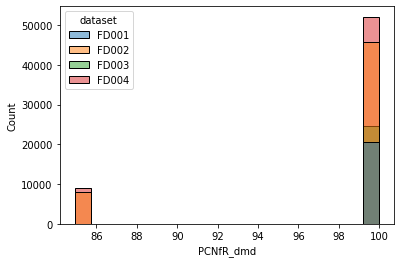

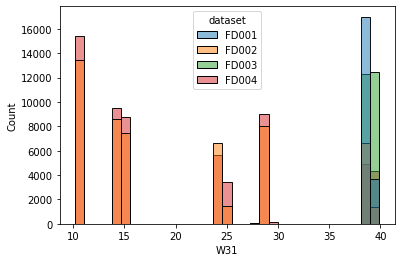

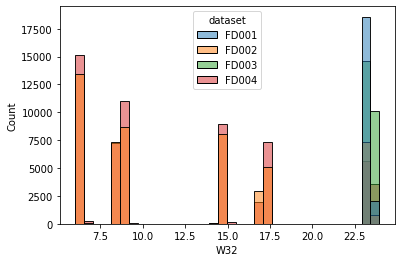

In [123]:

#histogramy z kolorowaniem po datasetcie
for sensor in sensors:
    sns.histplot(data = train, x = sensor, hue = 'dataset')
    plt.show()


In [124]:
maxi_df = pd.DataFrame(train.groupby(["esn", "dataset"])["cycles"].max().reset_index())
maxi_df.rename(columns = {"cycles" : "max_cycles"}, inplace = True)
maxi_df.head()

esn dataset  max_cycles
0    1   FD001         192
1    1   FD002         149
2    1   FD003         259
3    1   FD004         321
4    2   FD001         287

In [125]:
train = train.merge(maxi_df, how = "left", on = ["esn", "dataset"])

In [126]:
train['rem_cycles'] = train['cycles'] - train['max_cycles']

In [127]:
train.head()

esn  cycles  opset1  opset2   TRA     T2    T24      T30      T50    P2  \
0    1       2  0.0019 -0.0003 100.0 518.67 642.15 1,591.82 1,403.14 14.62   
1    1       3 -0.0043  0.0003 100.0 518.67 642.35 1,587.99  1,404.2 14.62   
2    1       4  0.0007     0.0 100.0 518.67 642.35 1,582.79 1,401.87 14.62   
3    1       5 -0.0019 -0.0002 100.0 518.67 642.37 1,582.85 1,406.22 14.62   
4    1       6 -0.0043 -0.0001 100.0 518.67  642.1 1,584.47 1,398.37 14.62   

    P15    P30       Nf       Nc  epr  Ps30    phi      NRf      NRc    BPR  \
0 21.61 553.75 2,388.04 9,044.07  1.3 47.49 522.28 2,388.07 8,131.49 8.4318   
1 21.61 554.26 2,388.08 9,052.94  1.3 47.27 522.42 2,388.03 8,133.23 8.4178   
2 21.61 554.45 2,388.11 9,049.48  1.3 47.13 522.86 2,388.08 8,133.83 8.3682   
3 21.61  554.0 2,388.06 9,055.15  1.3 47.28 522.19 2,388.04  8,133.8 8.4294   
4 21.61 554.67 2,388.02 9,049.68  1.3 47.16 521.68 2,388.03 8,132.85 8.4108   

   farB  htBleed  Nf_dmd  PCNfR_dmd   W31     W32 dataset  max_cycles  \
0  0.03      392    2388      100.0  39.0 23.4236   FD001         192   
1  0.03      390    2388      100.0 38.95 23.3442   FD001         192   
2  0.03      392    2388      100.0 38.88 23.3739   FD001         192   
3  0.03      393    2388      100.0  38.9 23.4044   FD001         192   
4  0.03      391    2388      100.0 38.98 23.3669   FD001         192   

   rem_cycles  
0        -190  
1        -189  
2        -188  
3        -187  
4        -186

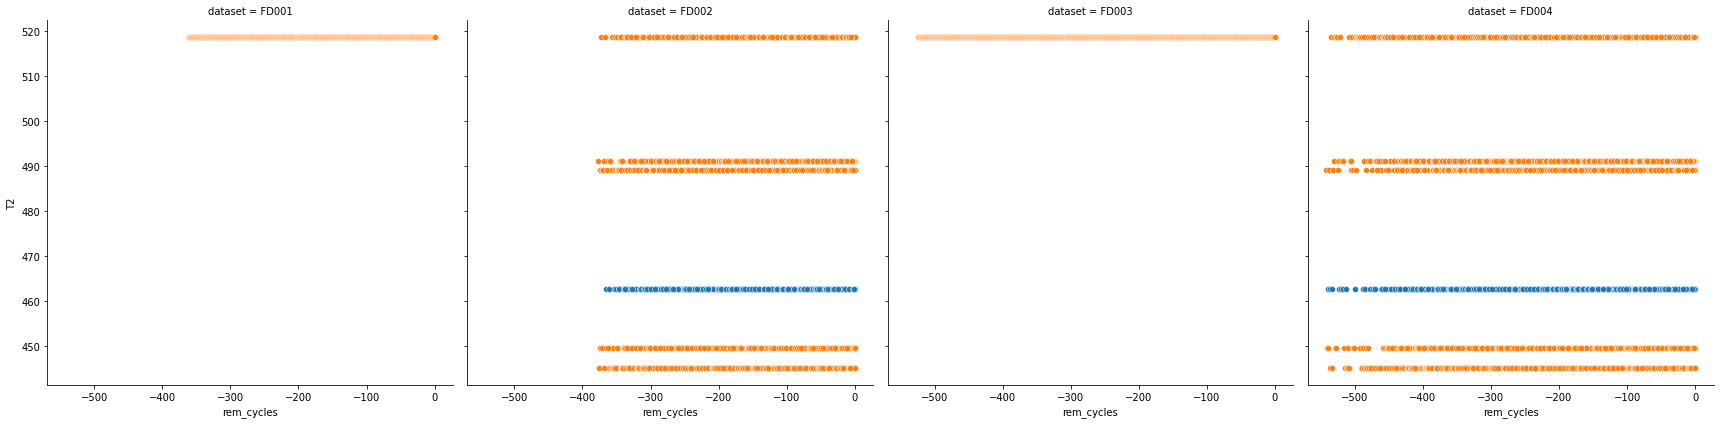

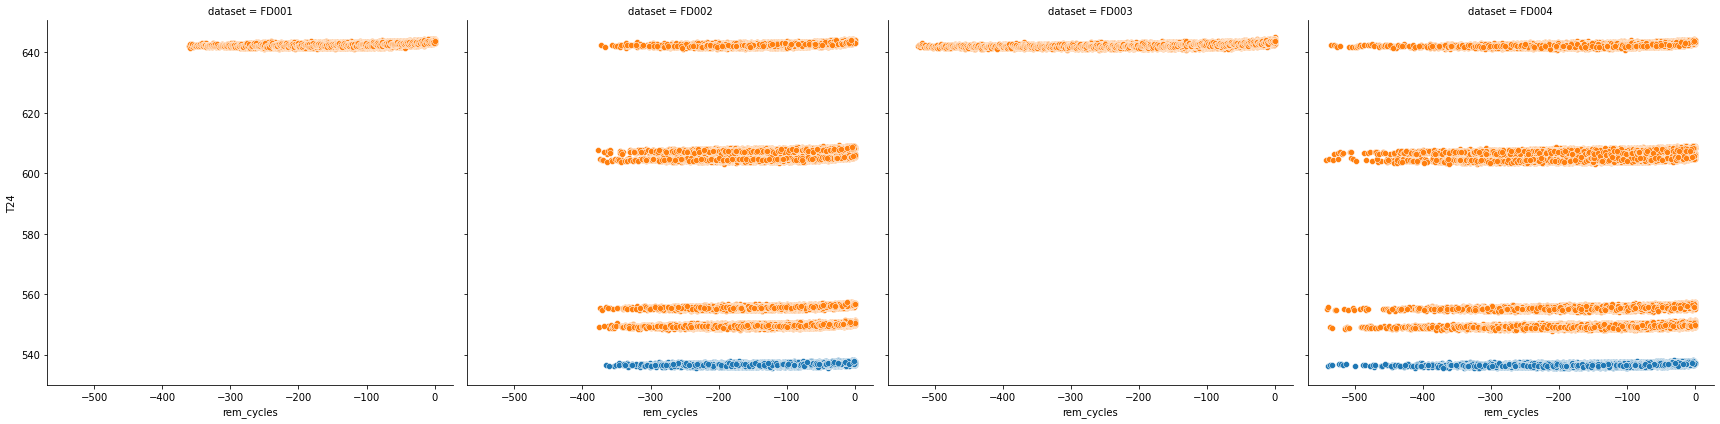

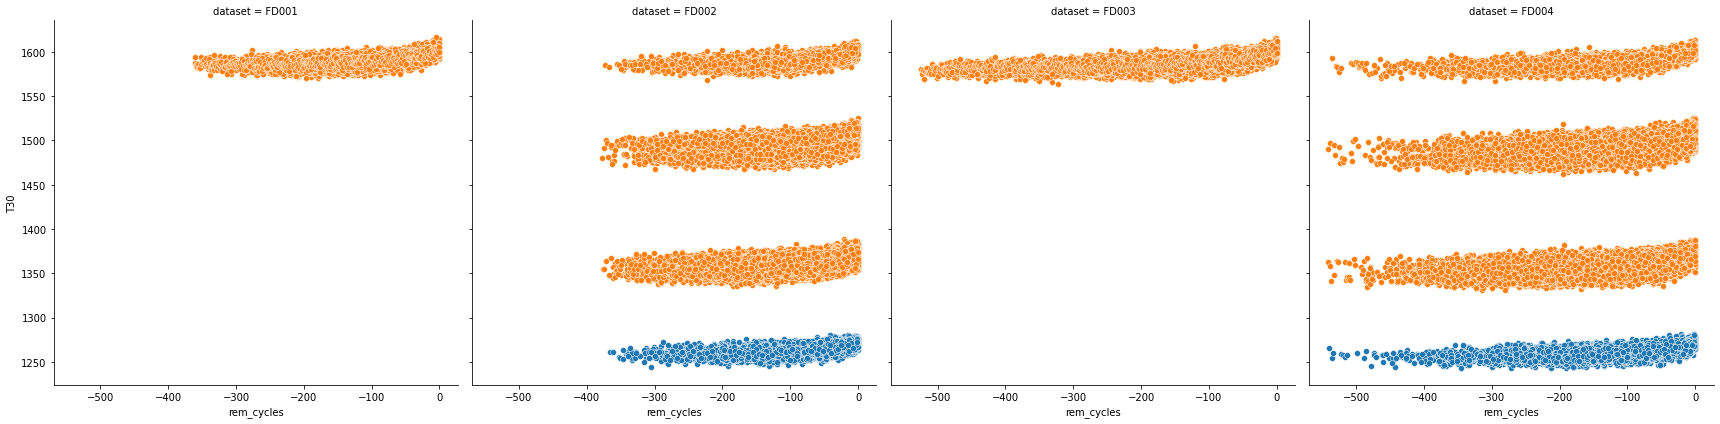

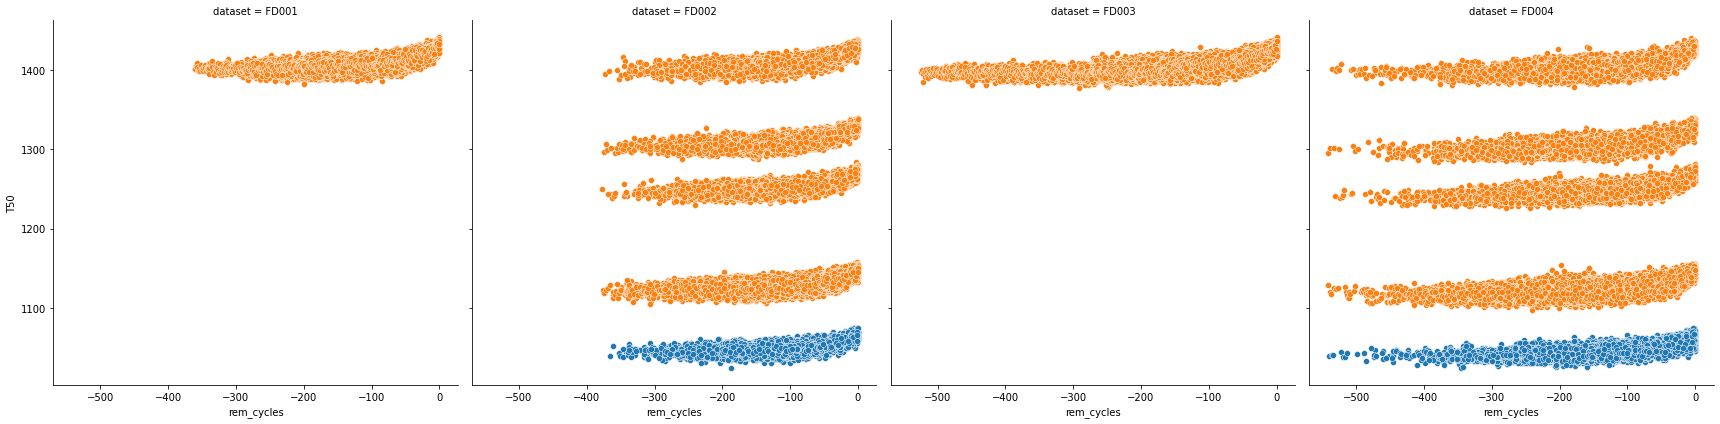

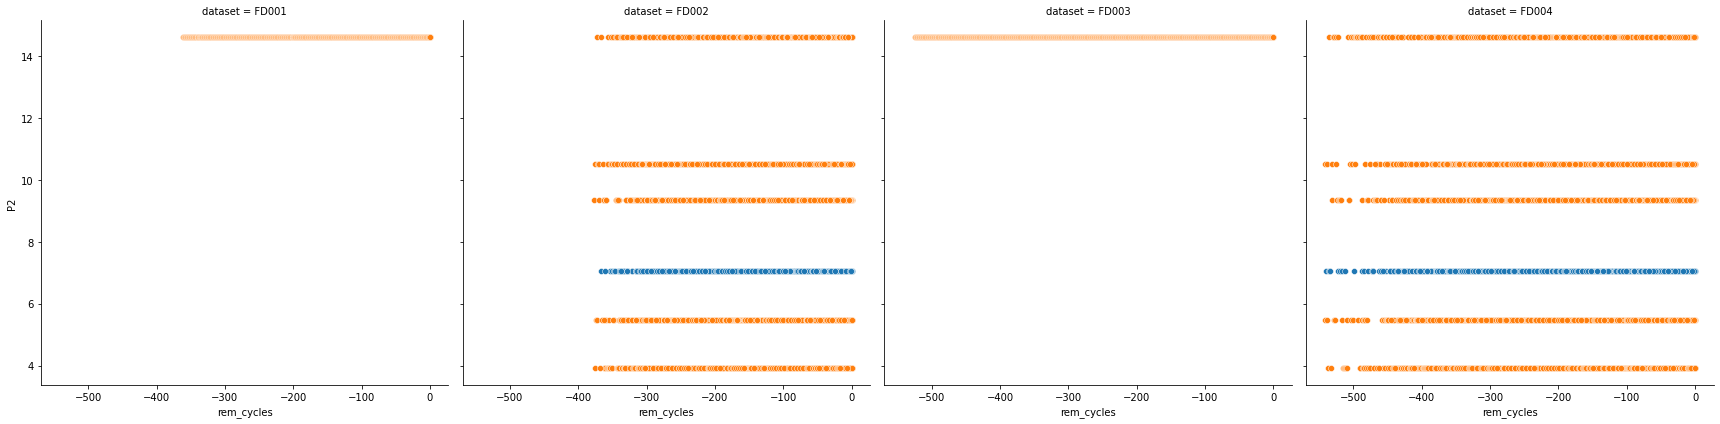

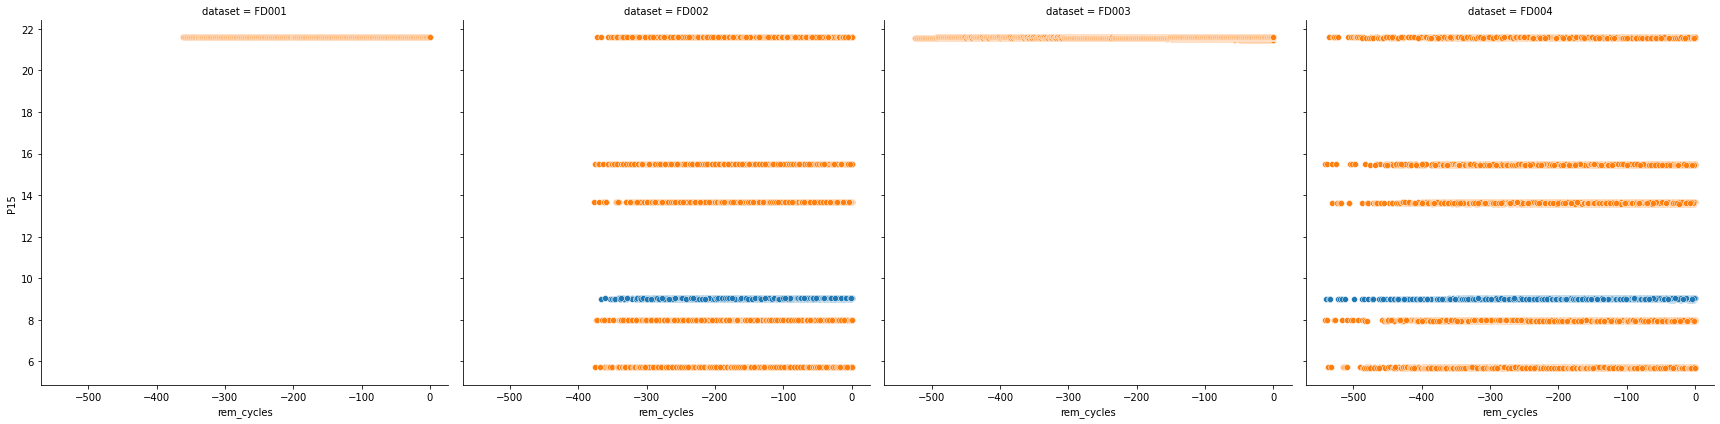

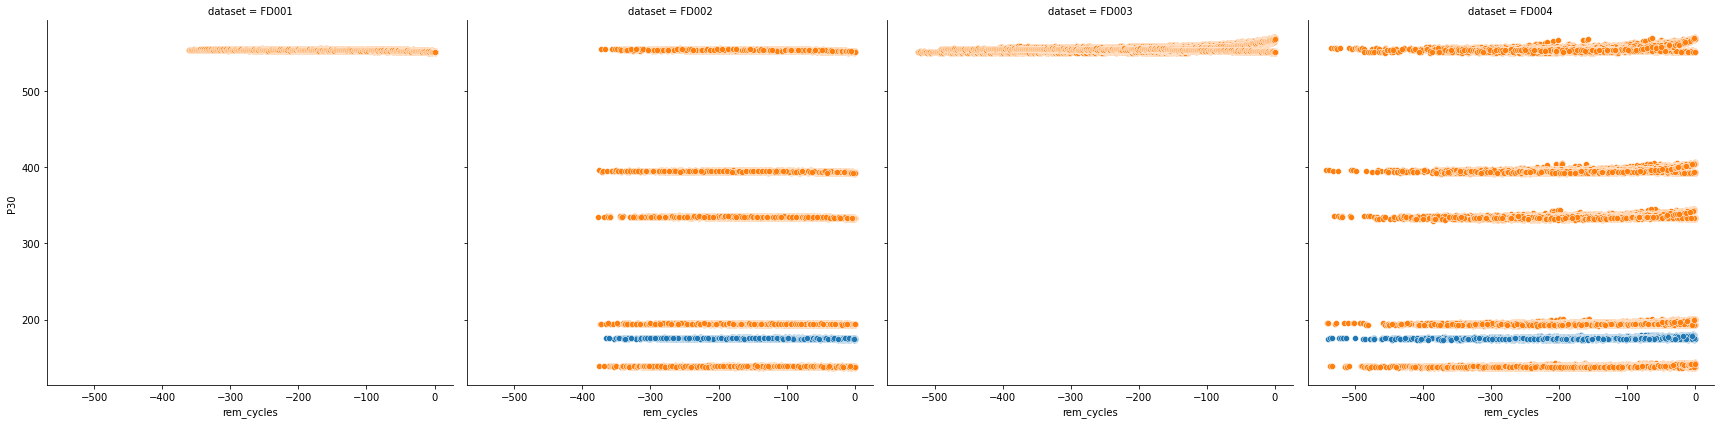

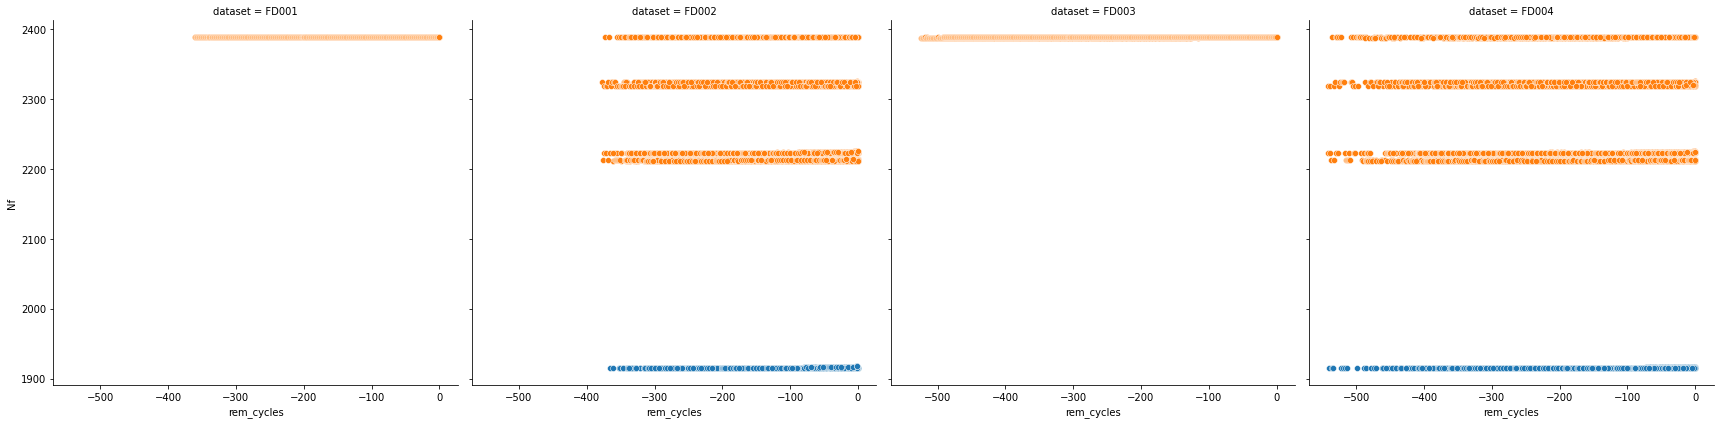

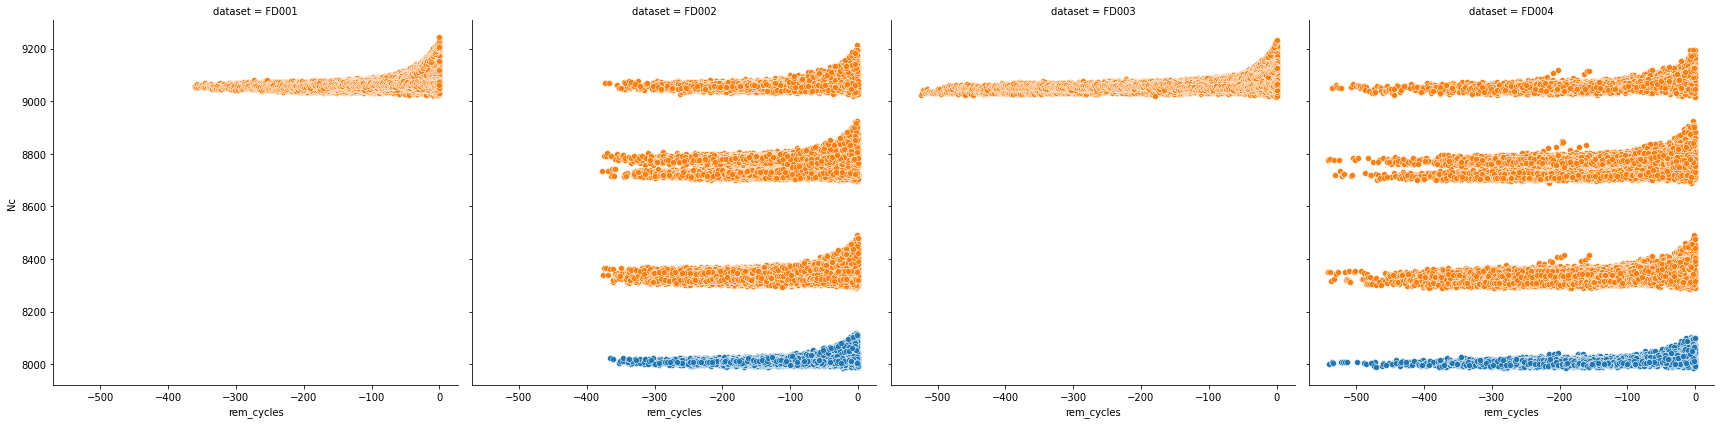

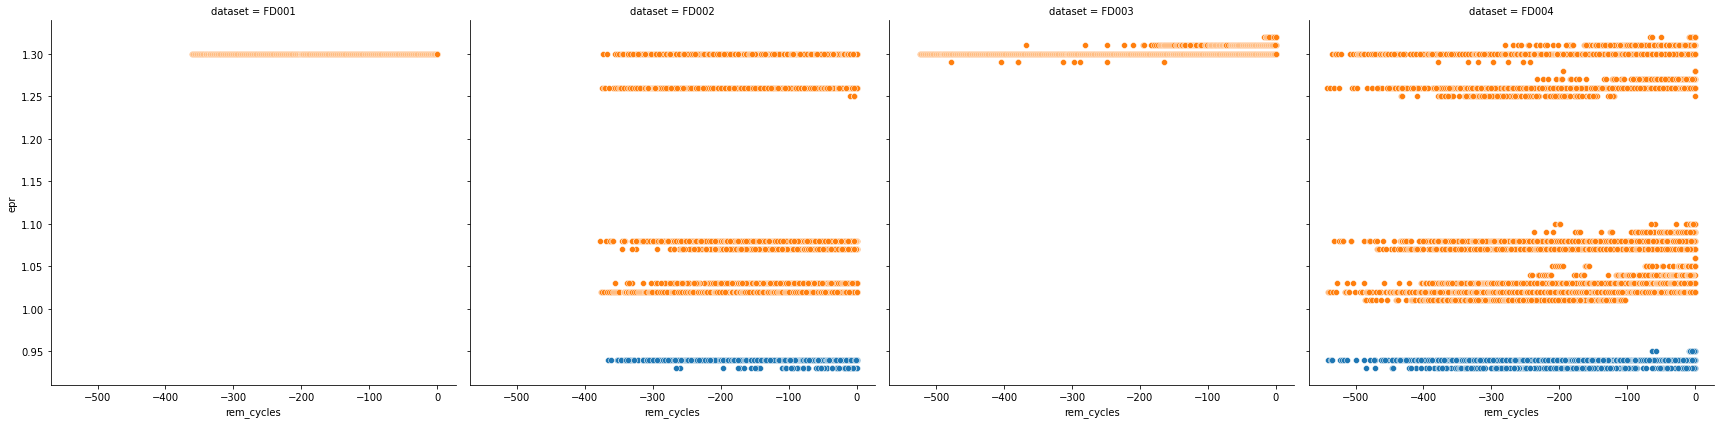

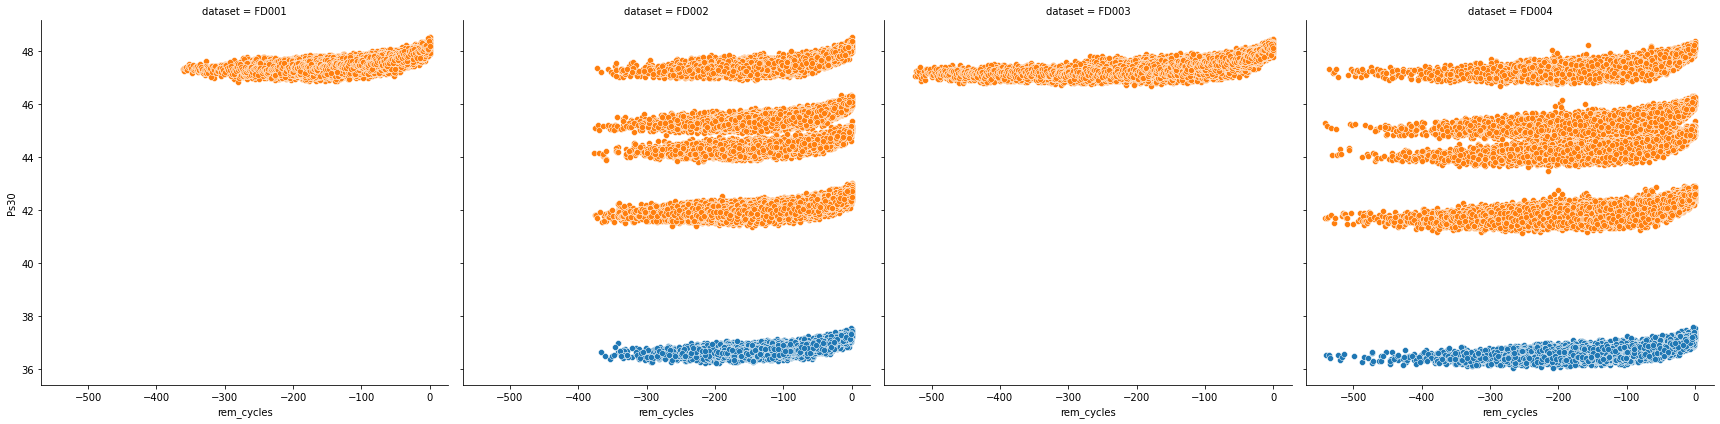

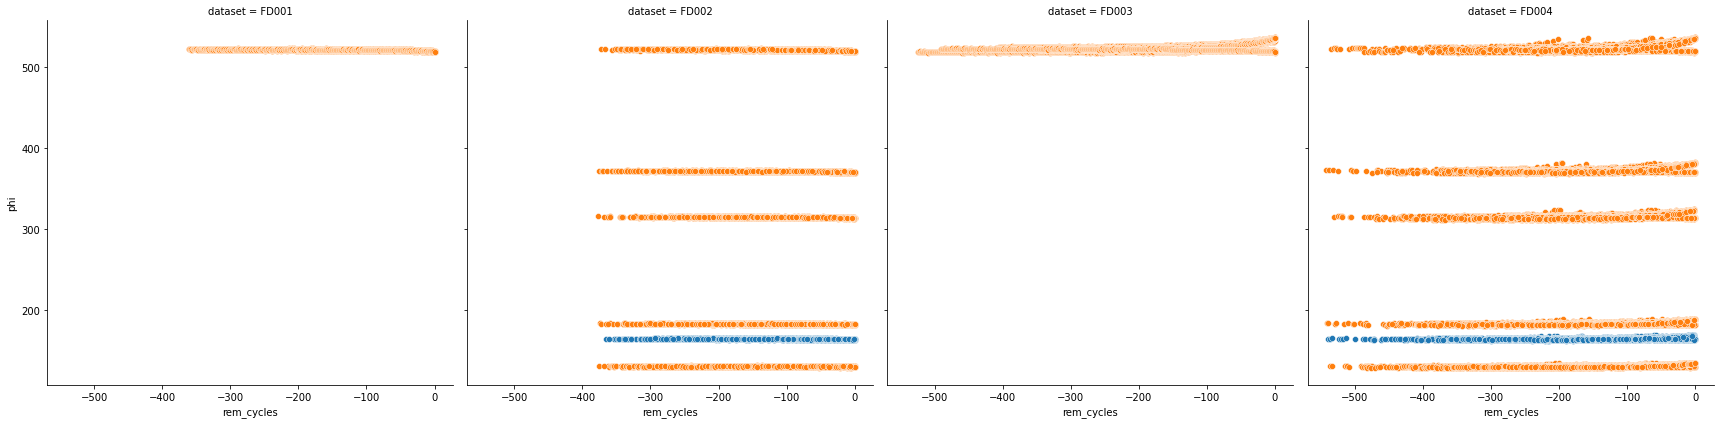

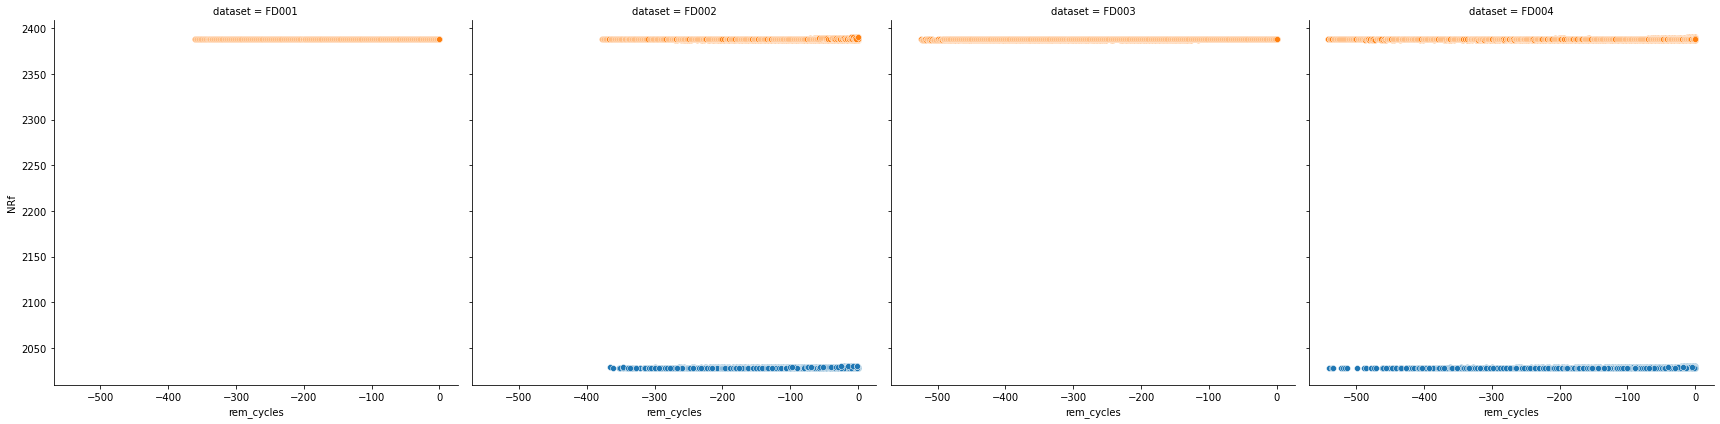

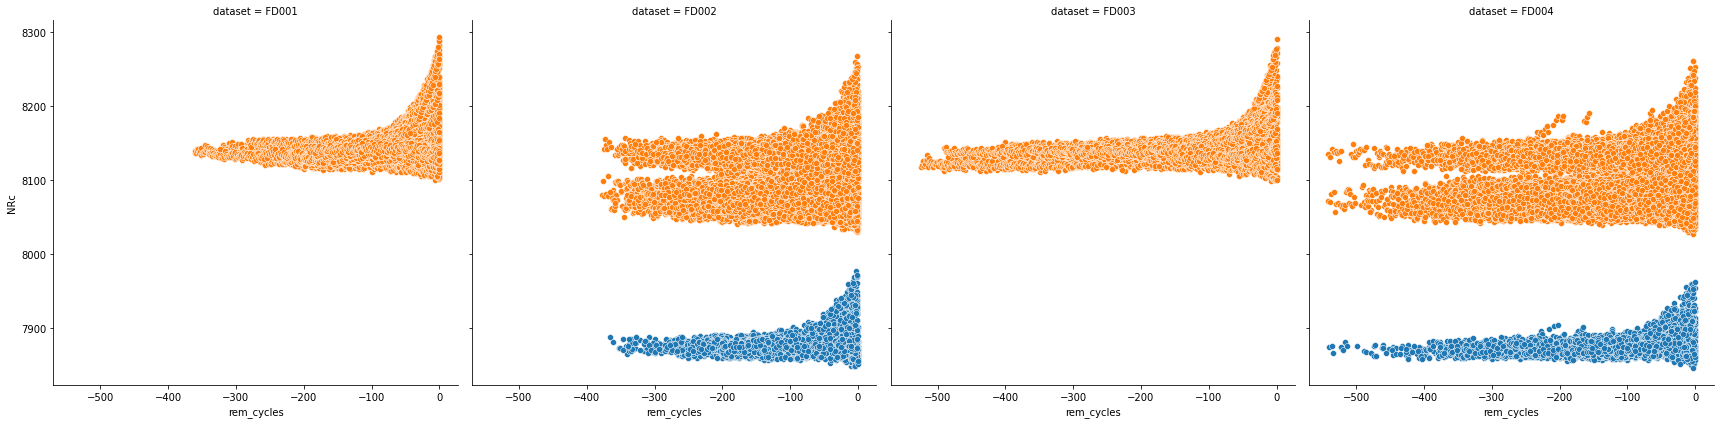

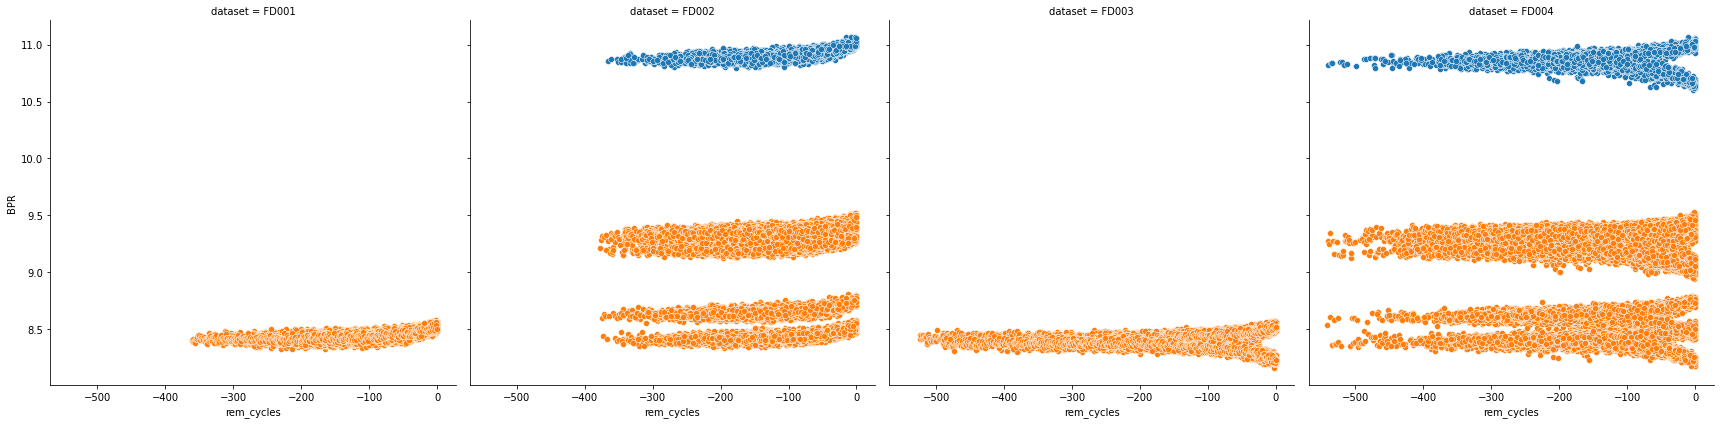

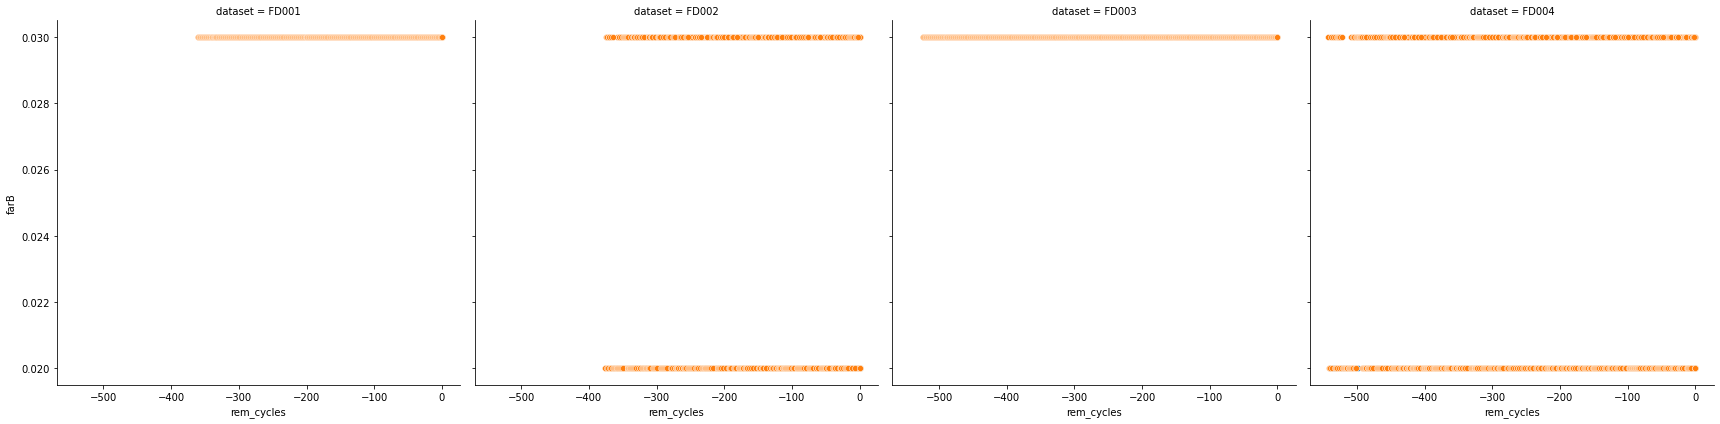

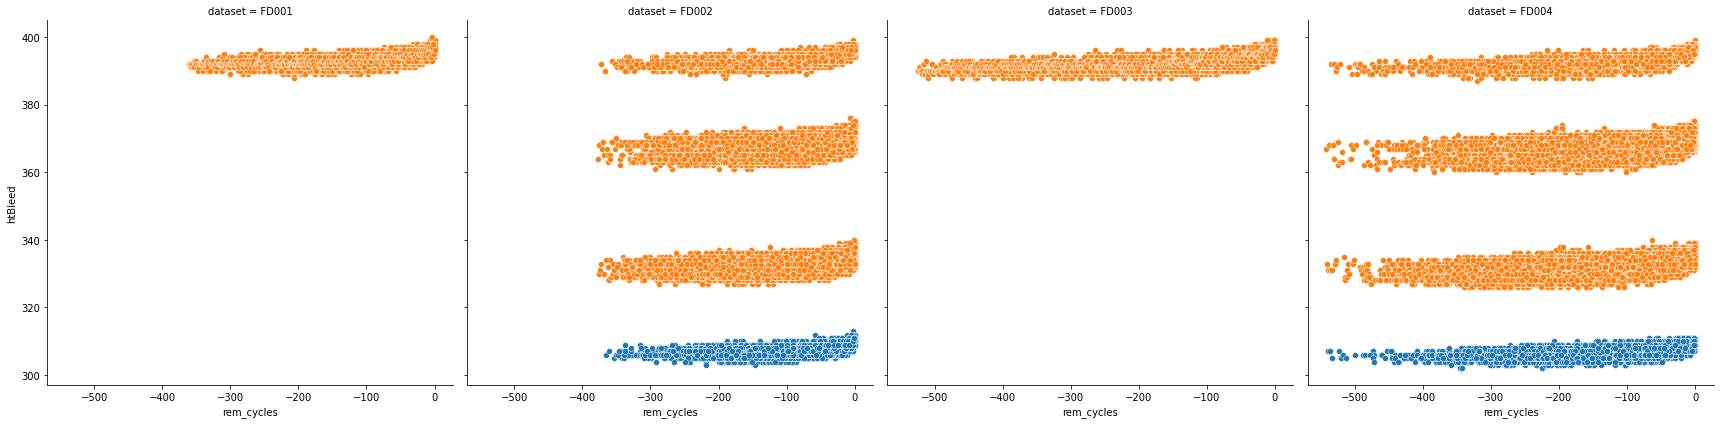

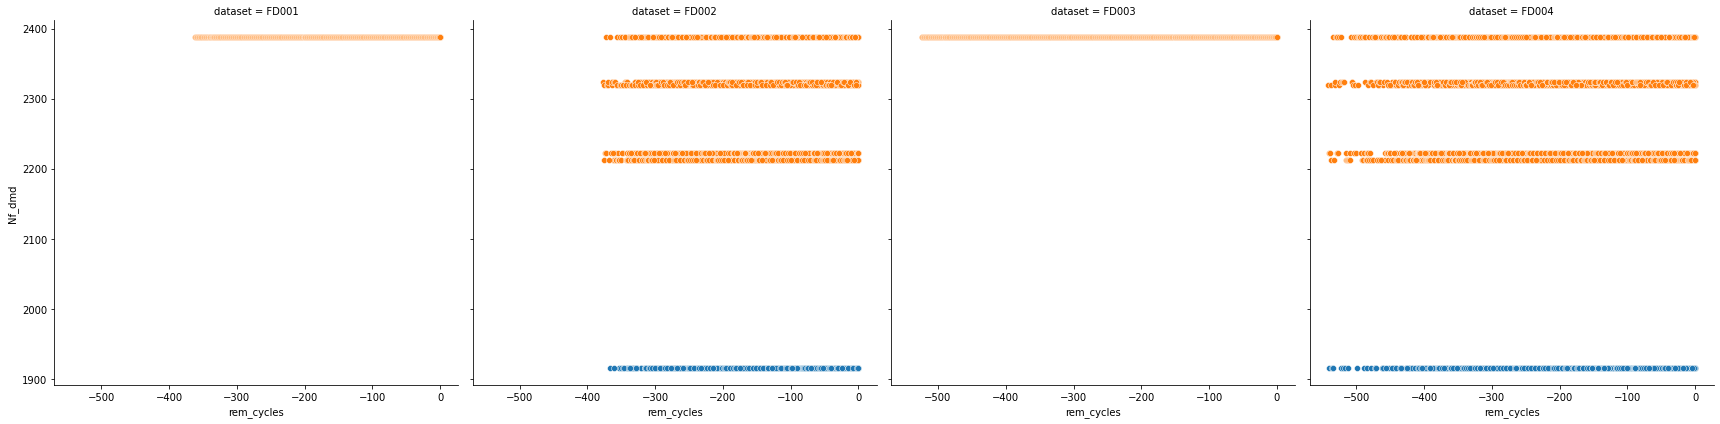

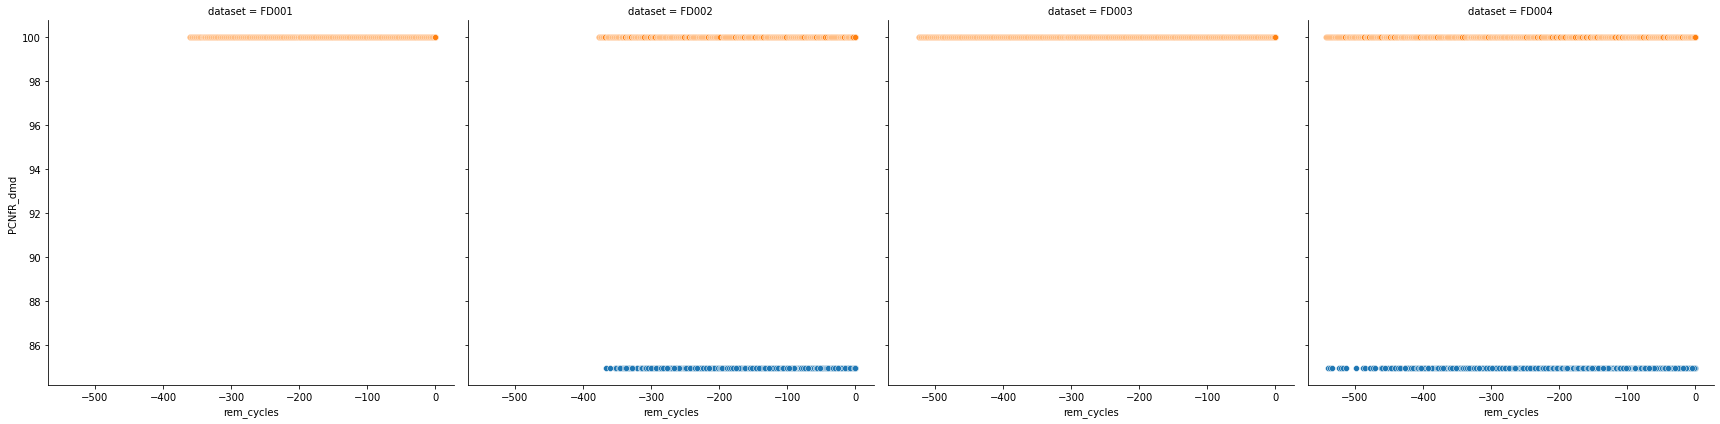

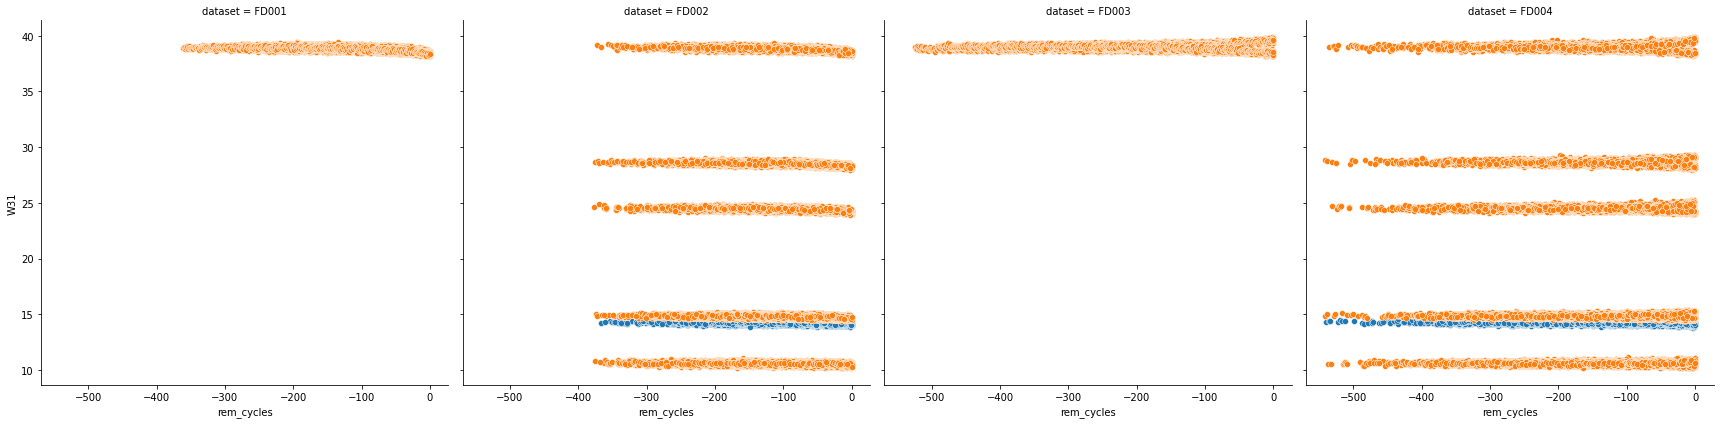

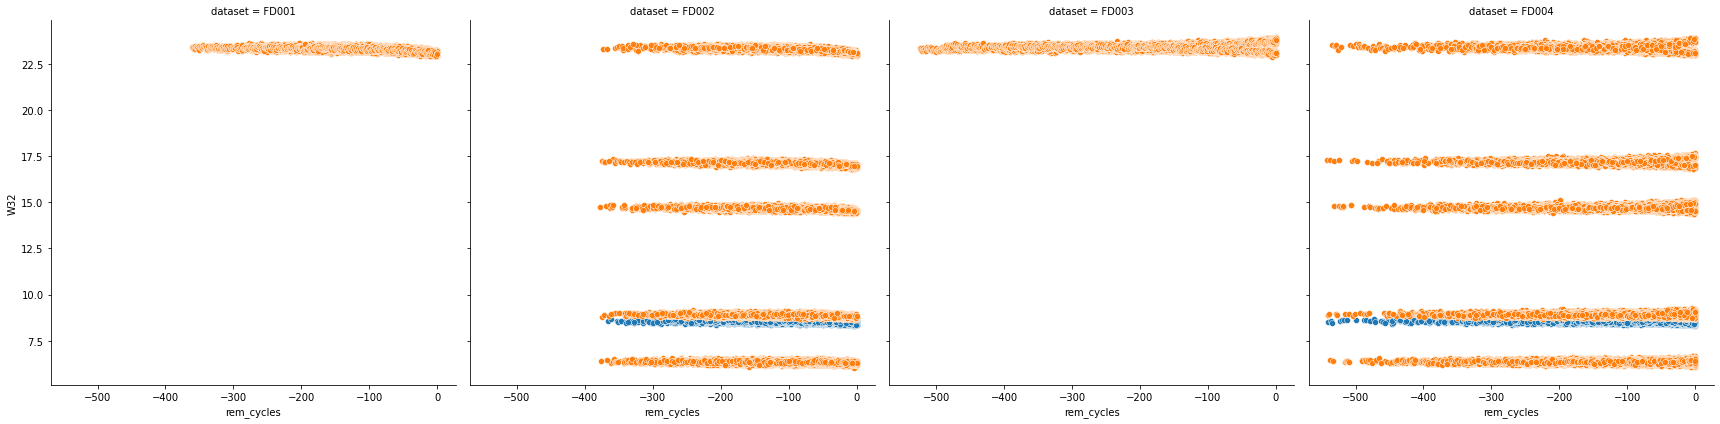

In [128]:
for sensor in sensors:    
    g = sns.FacetGrid(data = train, col = "dataset", hue= "TRA",size=6)
    g.map(sns.scatterplot, "rem_cycles", sensor)
    plt.show()

Po opset 1 możemy rozróżnić 6 różnych trybów latania (conditions (Sea Level i inne))
Sprowadzamy 3 zmienne quasi ciągłe do jednej zmiennej z 6 poziomami >> kategoriami.
bo 0,0 to Sea Level
10, 0.22 to condition 2
20, 0.7 to condition 3
Niebieski to opset 1:  (25, 0.6)
opset 2 nie rozróżnia conditions 5 i 6, dlatego opset 1 wystarcza.



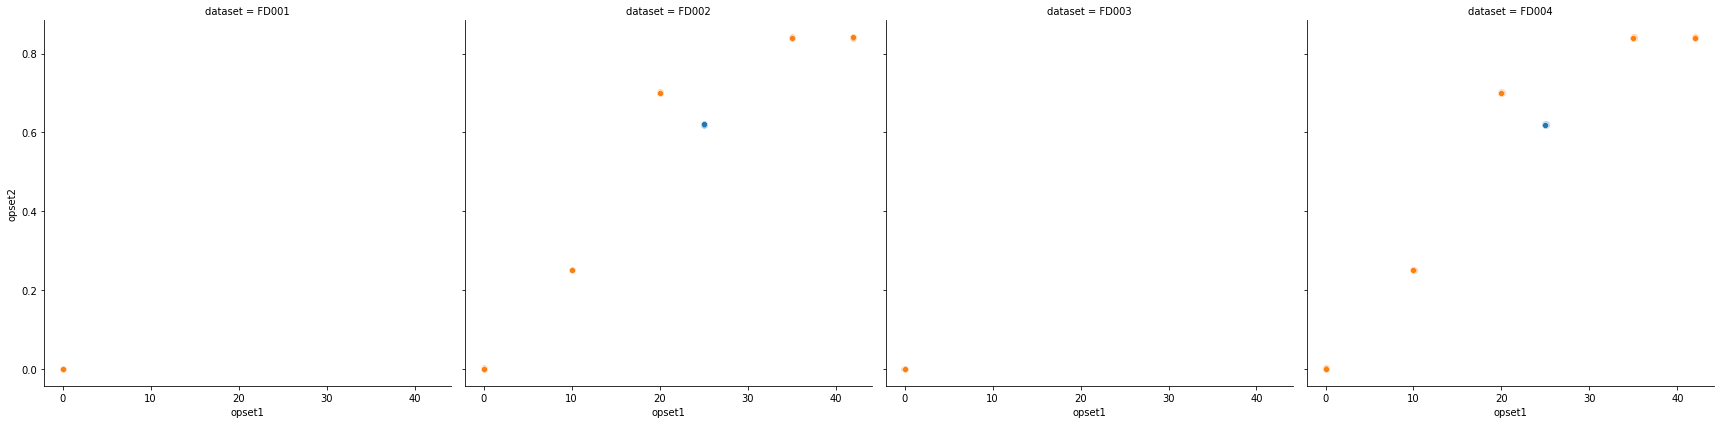

In [129]:
x = "opset1"
y = "opset2"
hue = "TRA"
g = sns.FacetGrid(data = train, col = "dataset", hue= "TRA", size=6)
g.map(sns.scatterplot, x, y)
plt.show()


In [130]:
train.describe()

esn             cycles             opset1  \
count          160,355.0          160,355.0          160,355.0   
mean  105.55636556390509 123.33438932368807 17.211922257491192   
std      72.866362604896  83.53695309314152  16.52790707957651   
min                  1.0                1.0            -0.0087   
25%                 44.0               57.0             0.0013   
50%                 89.0              114.0            19.9981   
75%                164.0              173.0            35.0015   
max                260.0              543.0             42.008   

                  opset2                TRA                 T2  \
count          160,355.0          160,355.0          160,355.0   
mean  0.4100034111814411   95.7242368494902 485.84096224002985   
std   0.3679368490270224 12.359179910937495 30.420239839414275   
min              -0.0006               60.0              445.0   
25%               0.0002              100.0             449.44   
50%                 0.62              100.0             489.05   
75%                 0.84              100.0             518.67   
max                0.842              100.0             518.67   

                    T24                T30                 T50  \
count         160,355.0          160,355.0           160,355.0   
mean   597.361023416794 1,467.035610177419 1,260.9564107760907   
std   42.47845592923608 118.17526792883352  136.30005277905528   
min              535.48           1,242.67            1,023.77   
25%              549.96           1,357.36            1,126.83   
50%              605.93           1,492.81            1,271.74   
75%              642.34           1,586.59             1,402.2   
max              645.11           1,616.91            1,441.49   

                     P2                P15                P30  \
count         160,355.0          160,355.0          160,355.0   
mean  9.895005331919803 14.424940164011103  359.7299588413209   
std   4.265534609958304  6.443895976302771 174.13327950808818   
min                3.91               5.67             136.17   
25%                5.48                8.0             175.71   
50%                9.35              13.66             341.69   
75%               14.62              21.61             553.29   
max               14.62              21.61             570.81   

                       Nf                Nc                 epr  \
count           160,355.0         160,355.0           160,355.0   
mean  2,273.8289884942783 8,677.55337563531   1.153704717657697   
std    142.42767744112453 374.6577105081706 0.14210293430351725   
min              1,914.72          7,984.51                0.93   
25%              2,212.12          8,334.77                1.02   
50%              2,319.37           8,764.2                1.09   
75%              2,388.05          9,055.85                 1.3   
max              2,388.64          9,244.59                1.32   

                   Ps30                phi                NRf  \
count         160,355.0          160,355.0          160,355.0   
mean  44.21203922546849  338.7898102959059 2,349.644287861308   
std   3.426356419080013 164.19296351635052 111.16846432465698   
min               36.04             128.31           2,027.57   
25%               42.01             164.79           2,387.97   
50%               44.93             321.69           2,388.07   
75%               47.34             521.34           2,388.16   
max               48.53             537.49           2,390.49   

                      NRc                BPR                 farB  \
count           160,355.0          160,355.0            160,355.0   
mean  8,088.9506511178315   9.05475118767734  0.02518536996040037   
std     80.62397346405147 0.7515864047763415 0.004996578195980995   
min              7,845.78             8.1563                 0.02   
25%              8,070.53             8.4393                 0.02   
50%              8,118.59             9.0301  

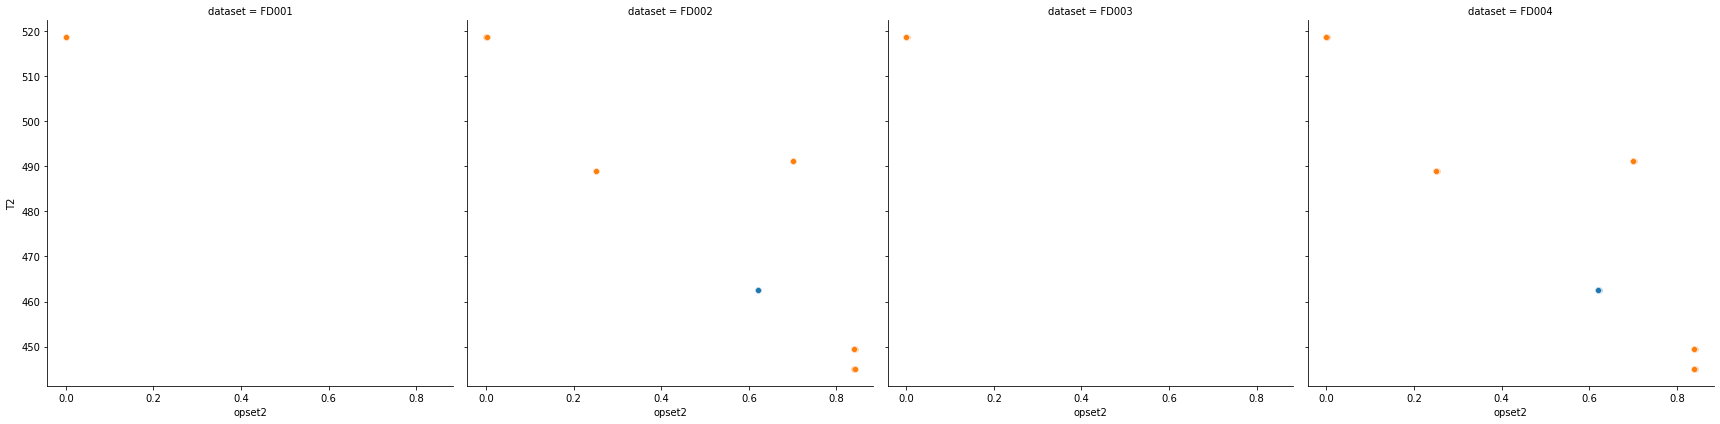

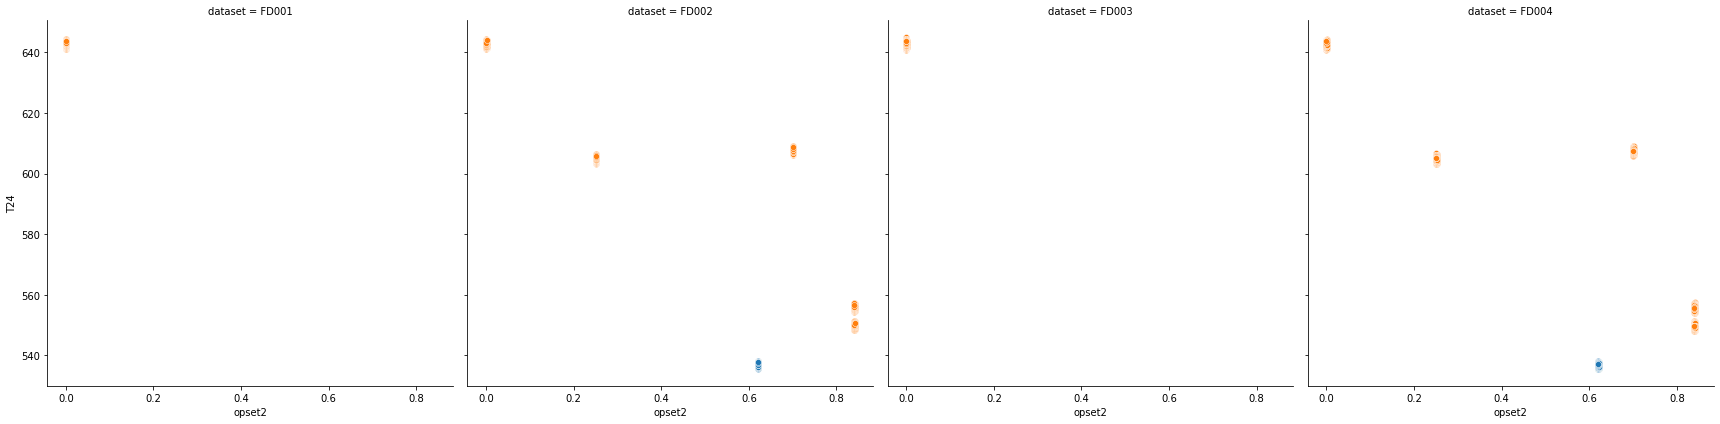

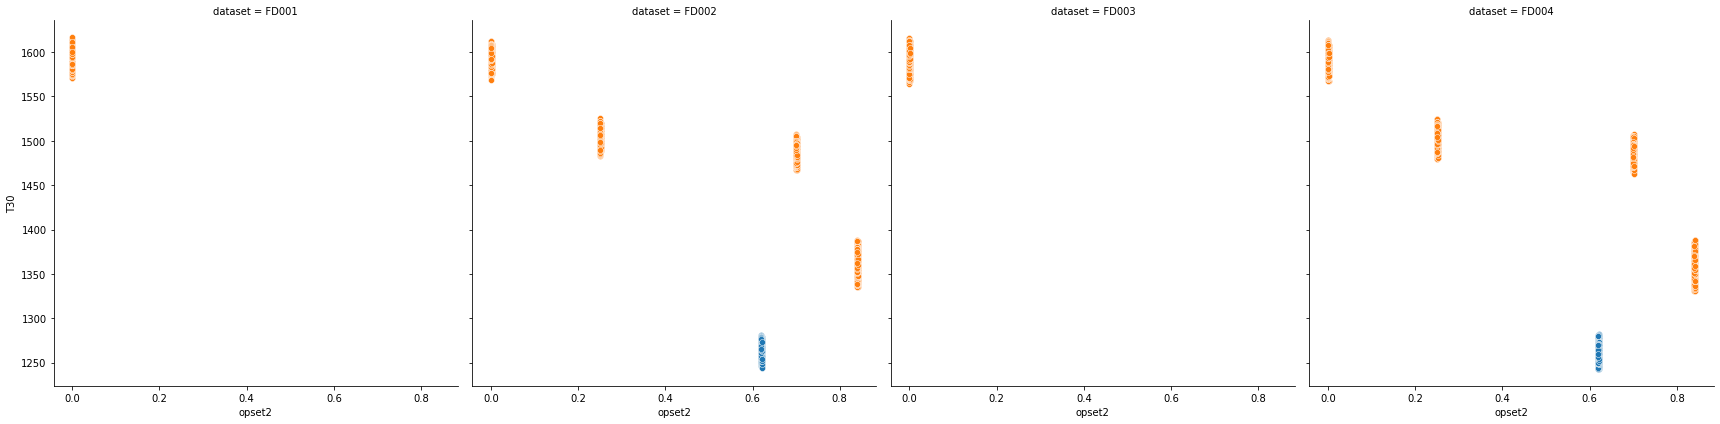

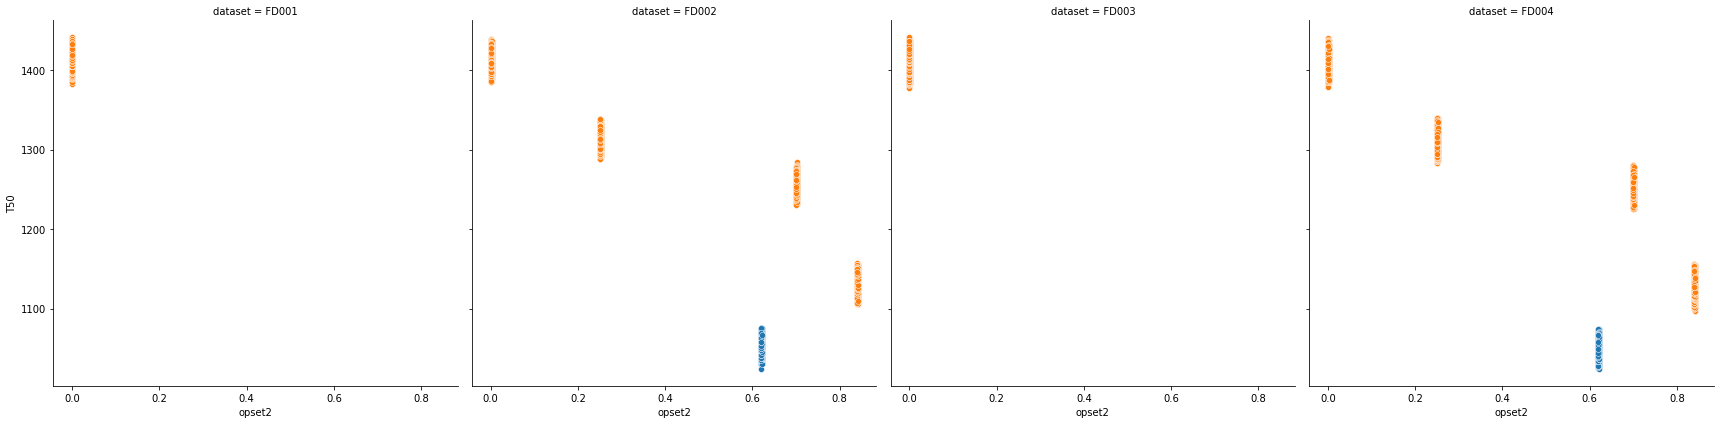

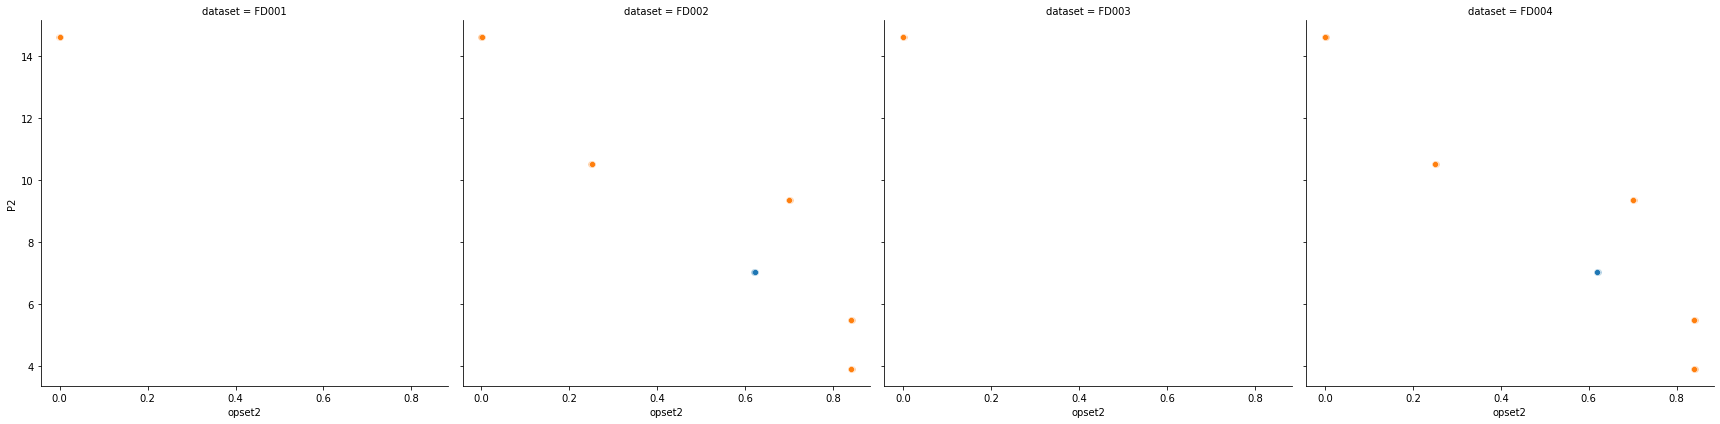

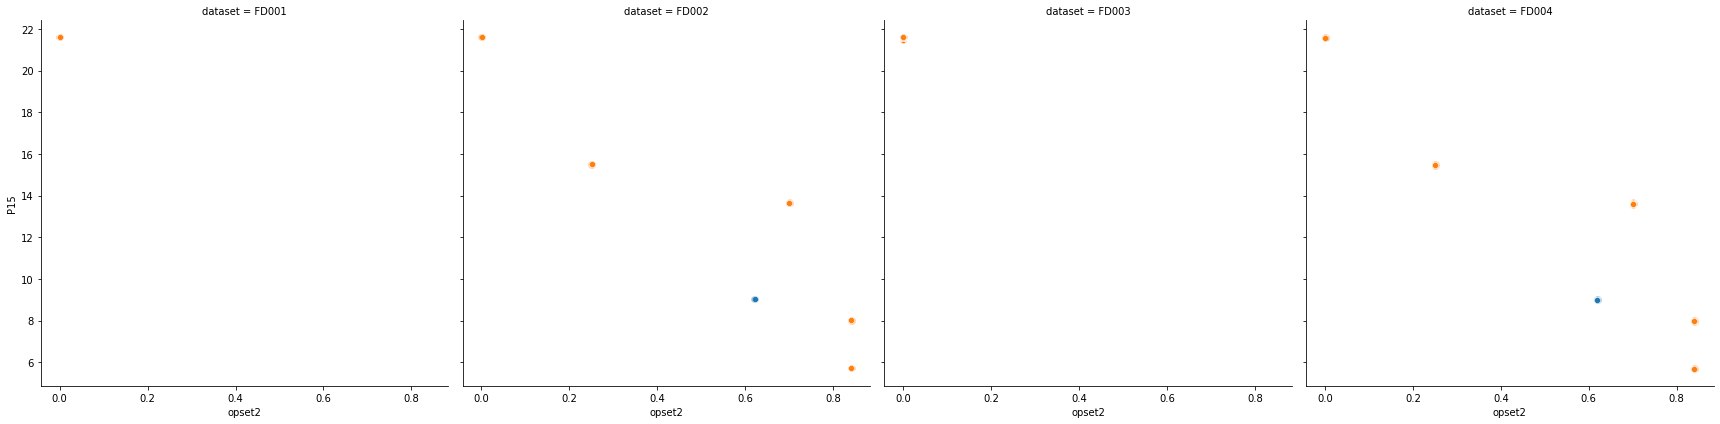

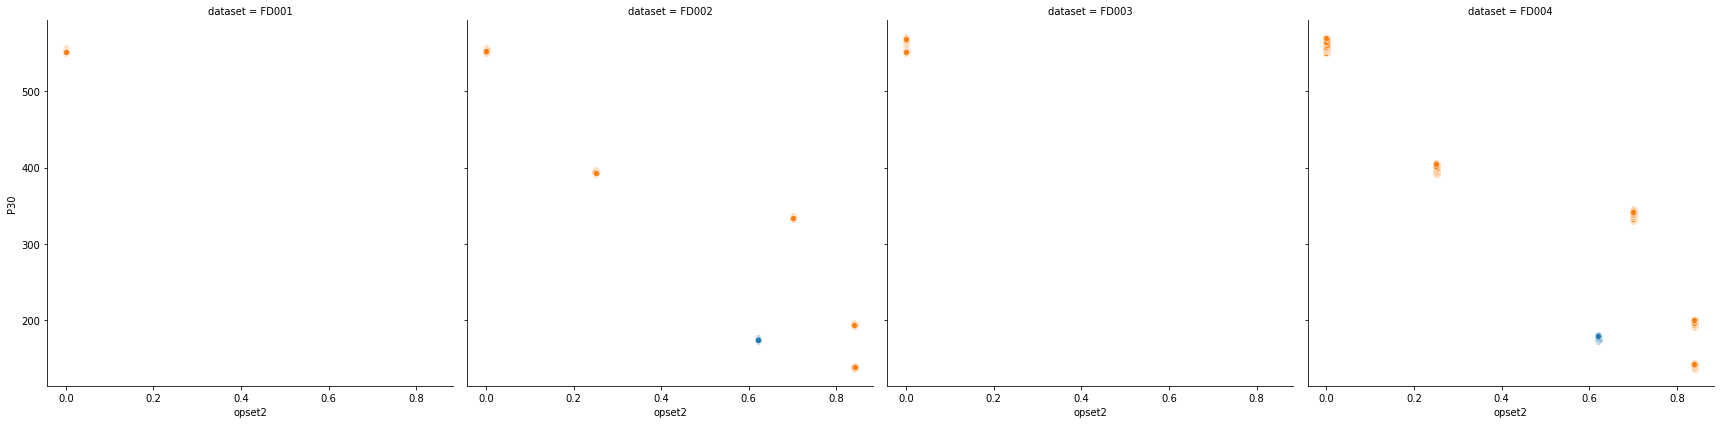

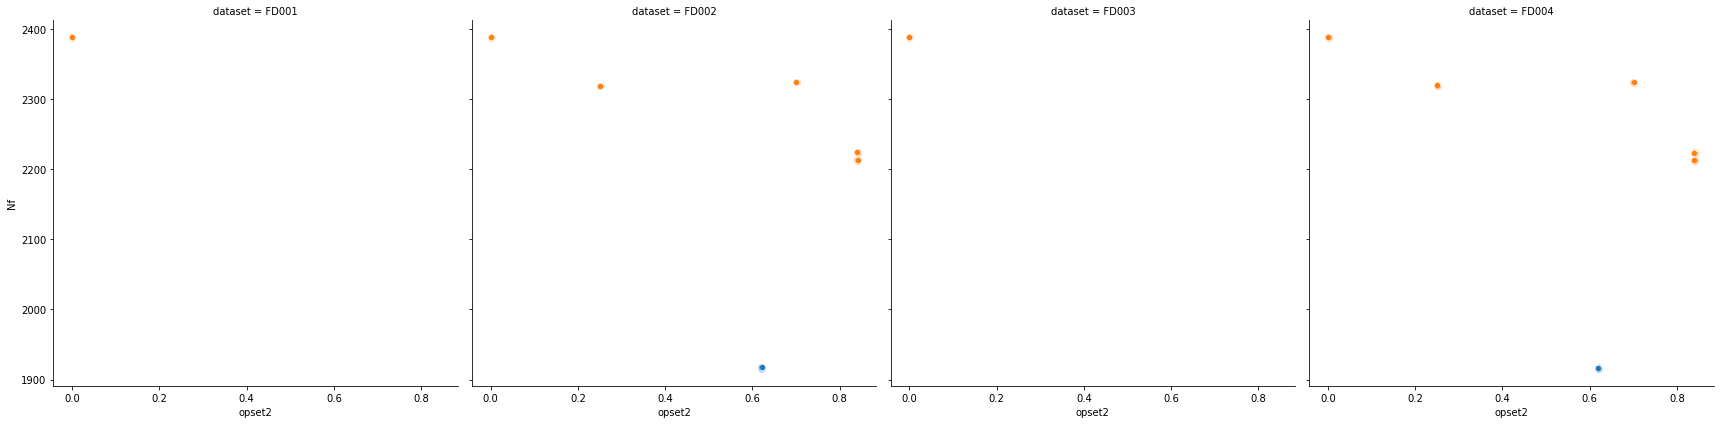

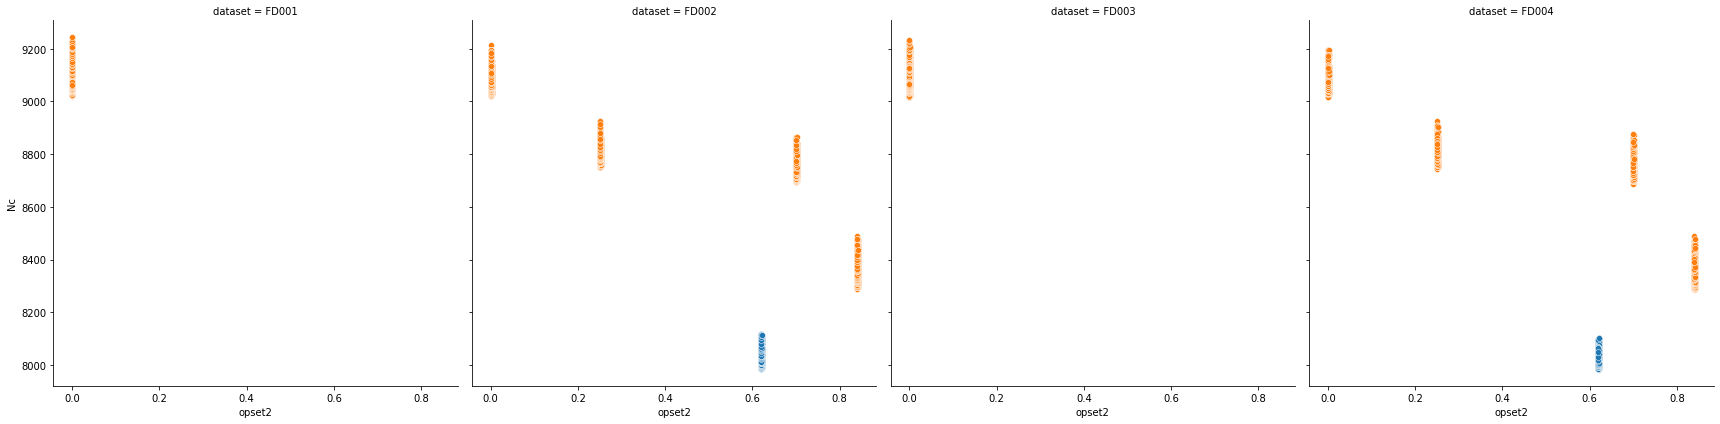

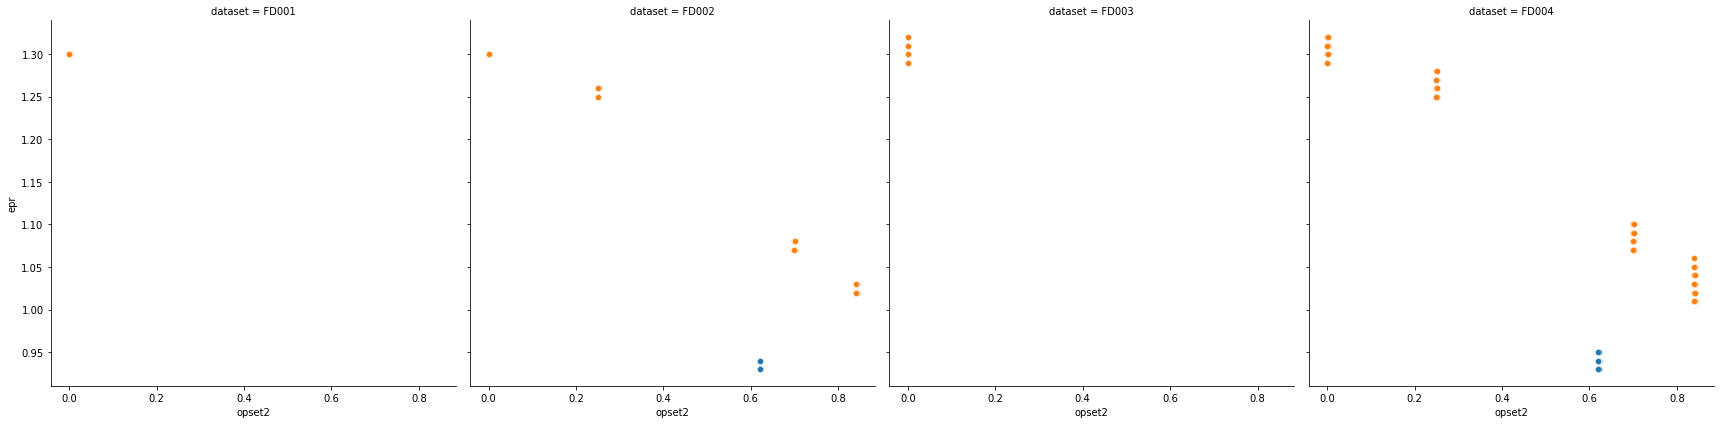

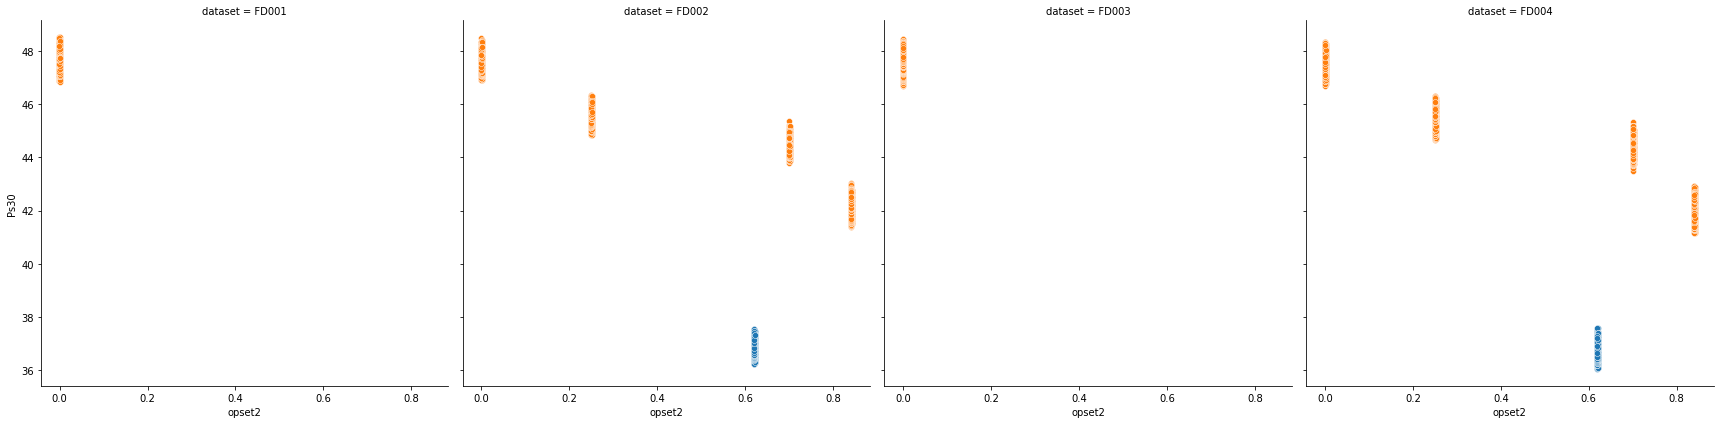

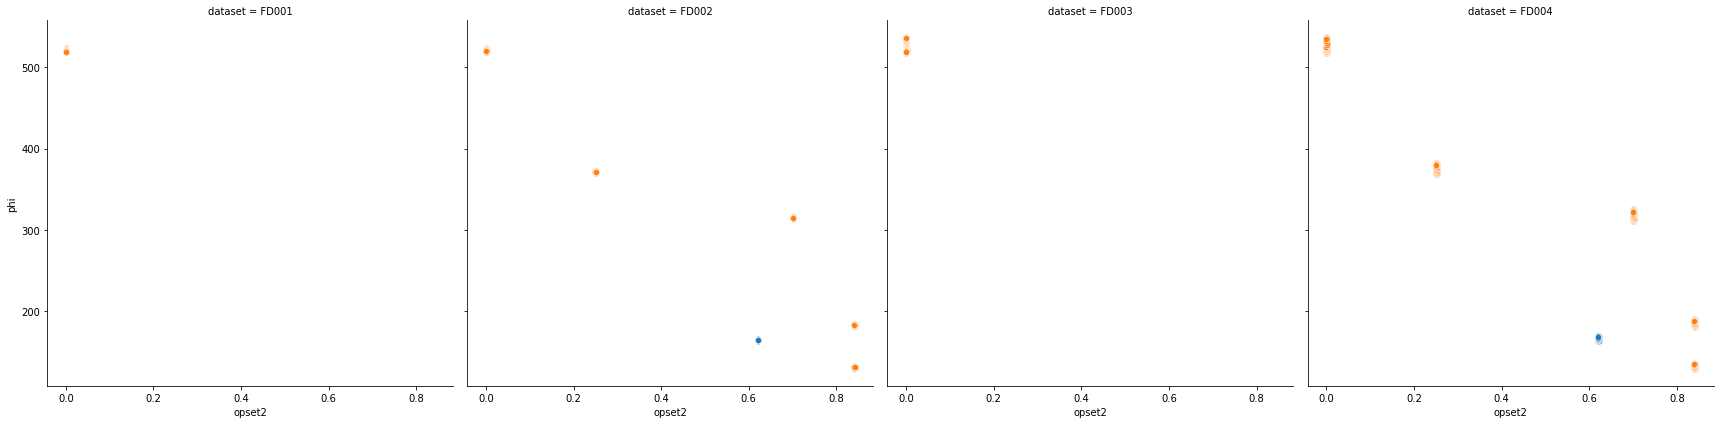

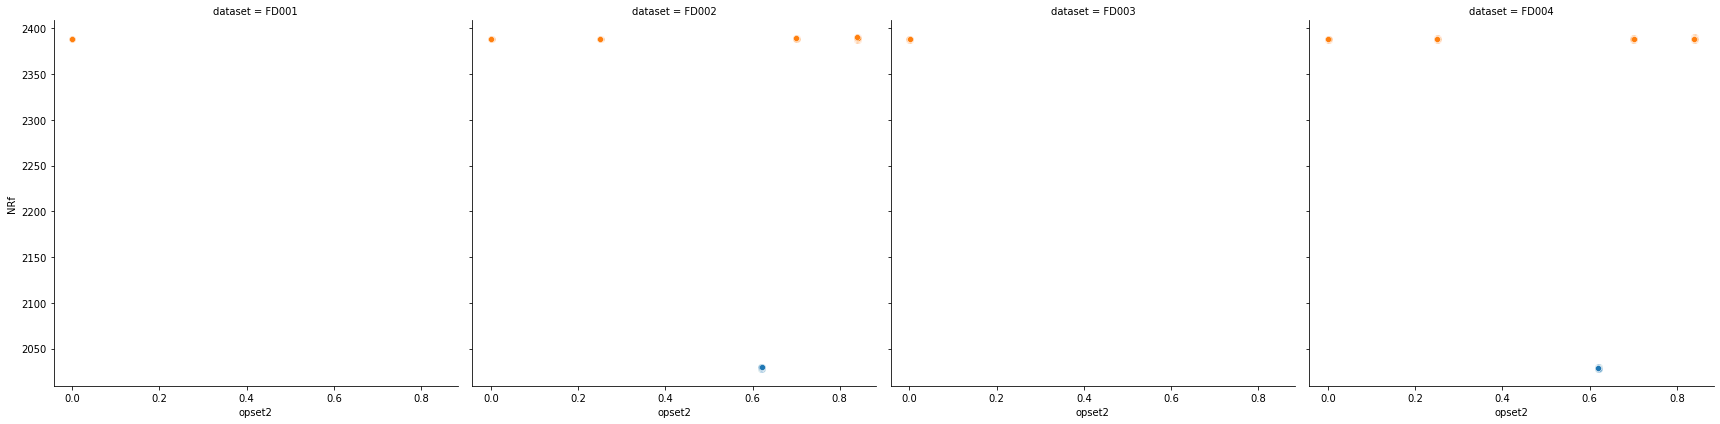

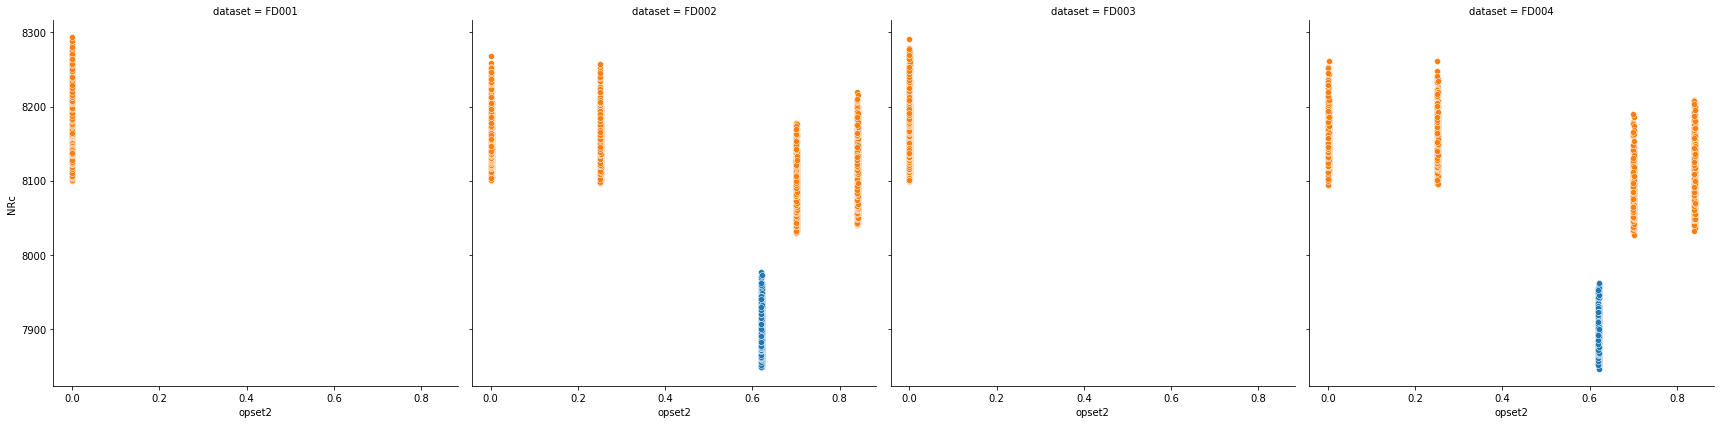

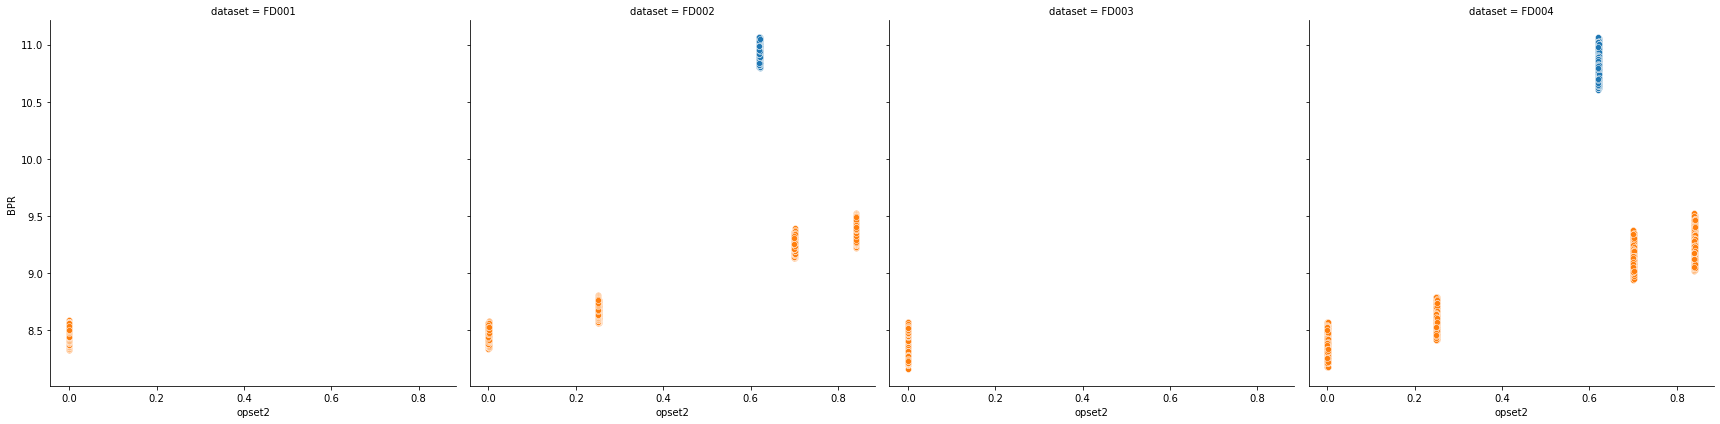

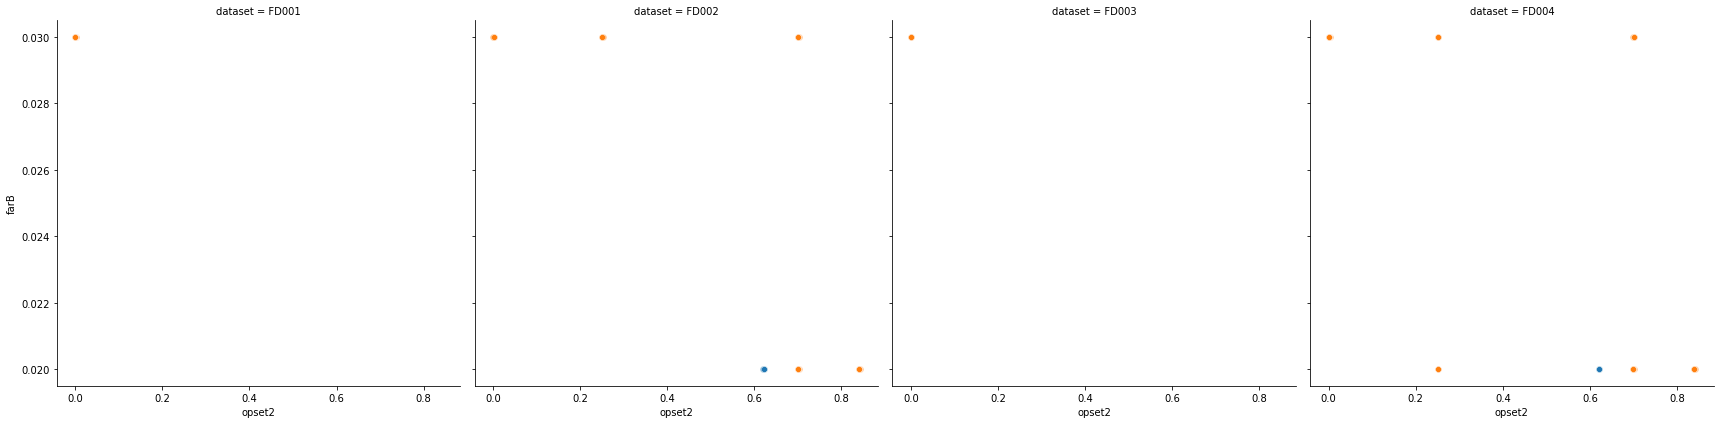

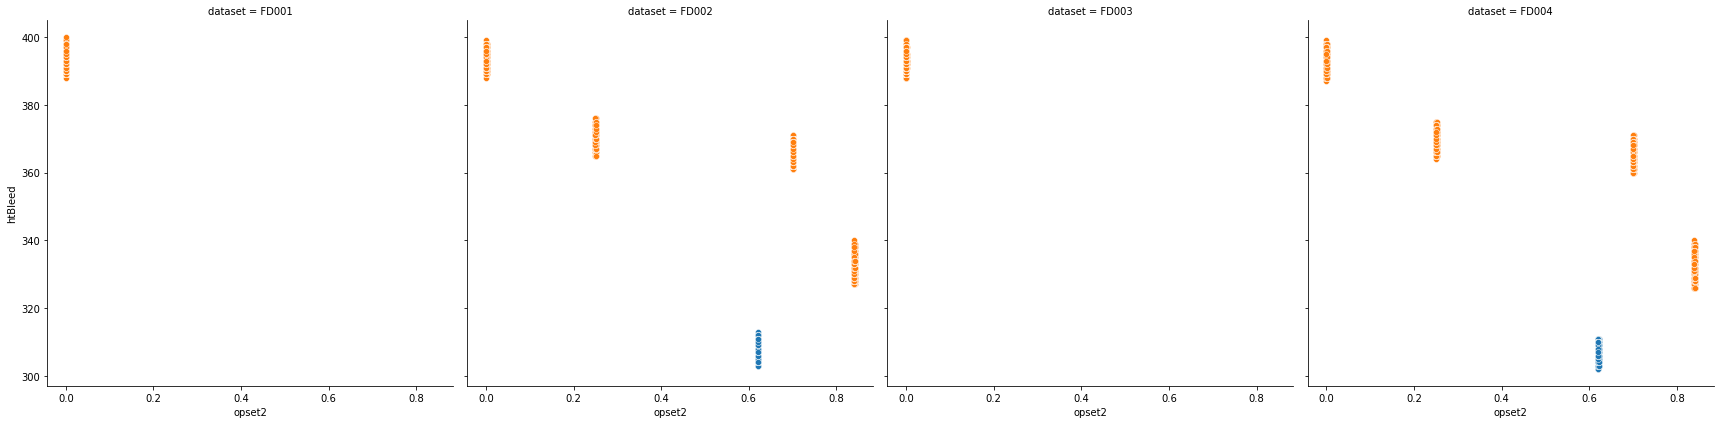

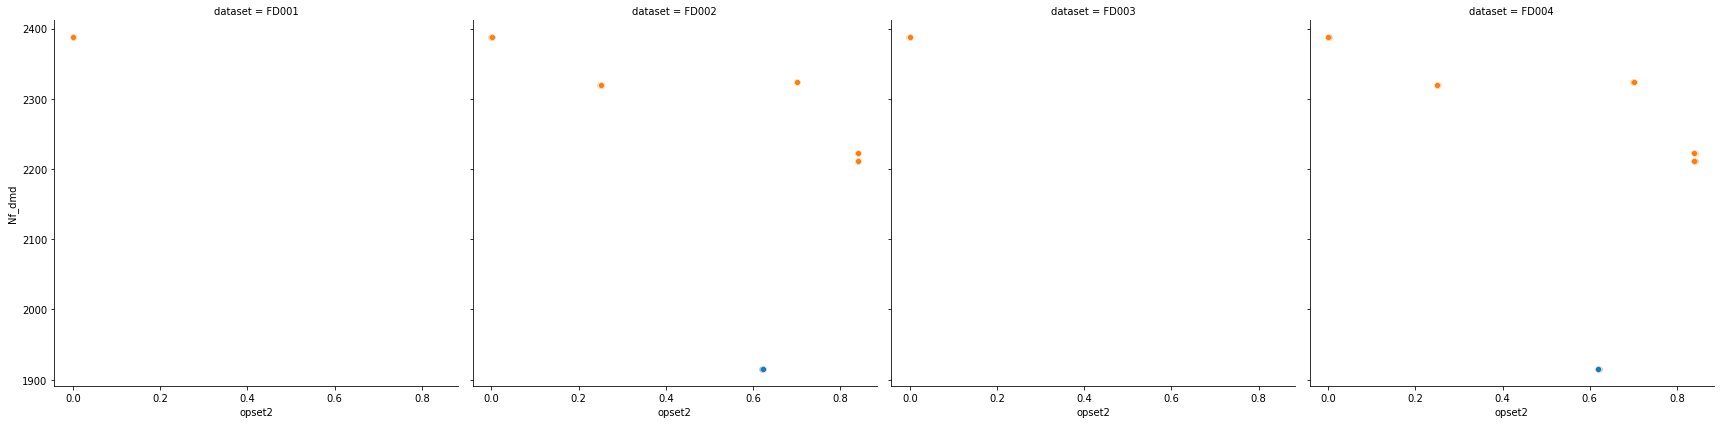

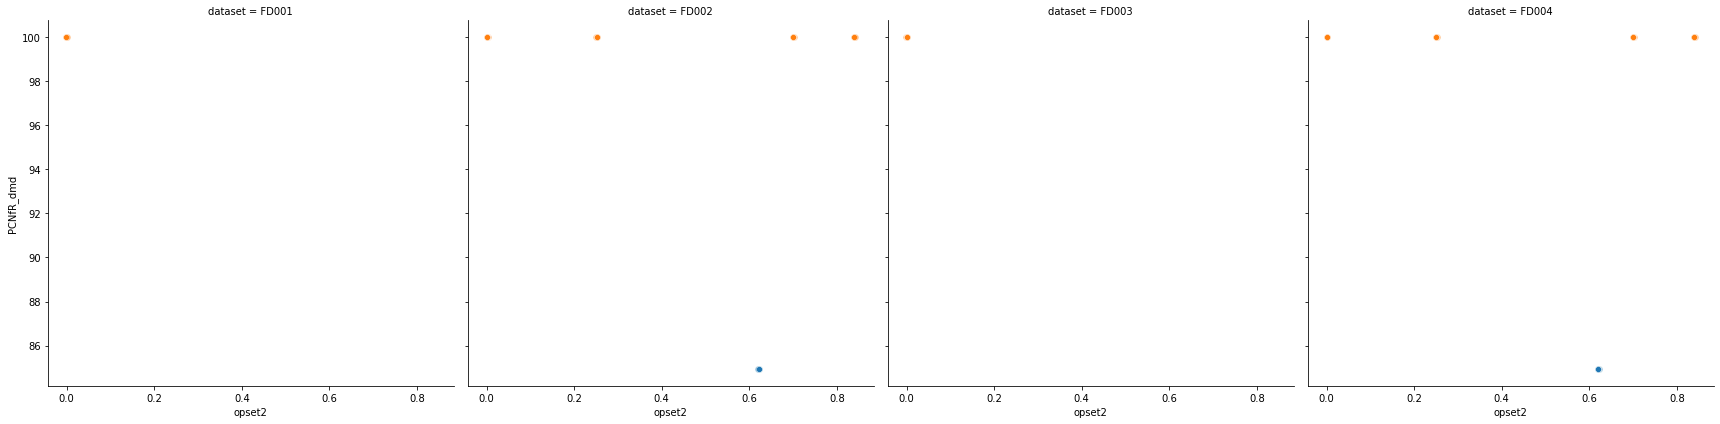

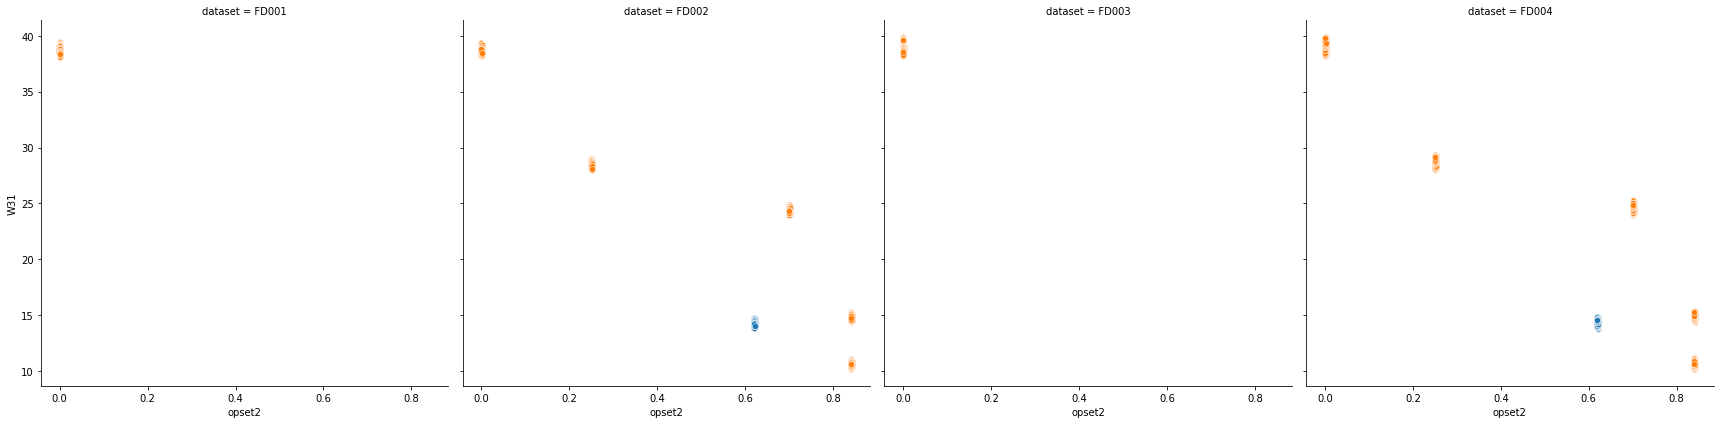

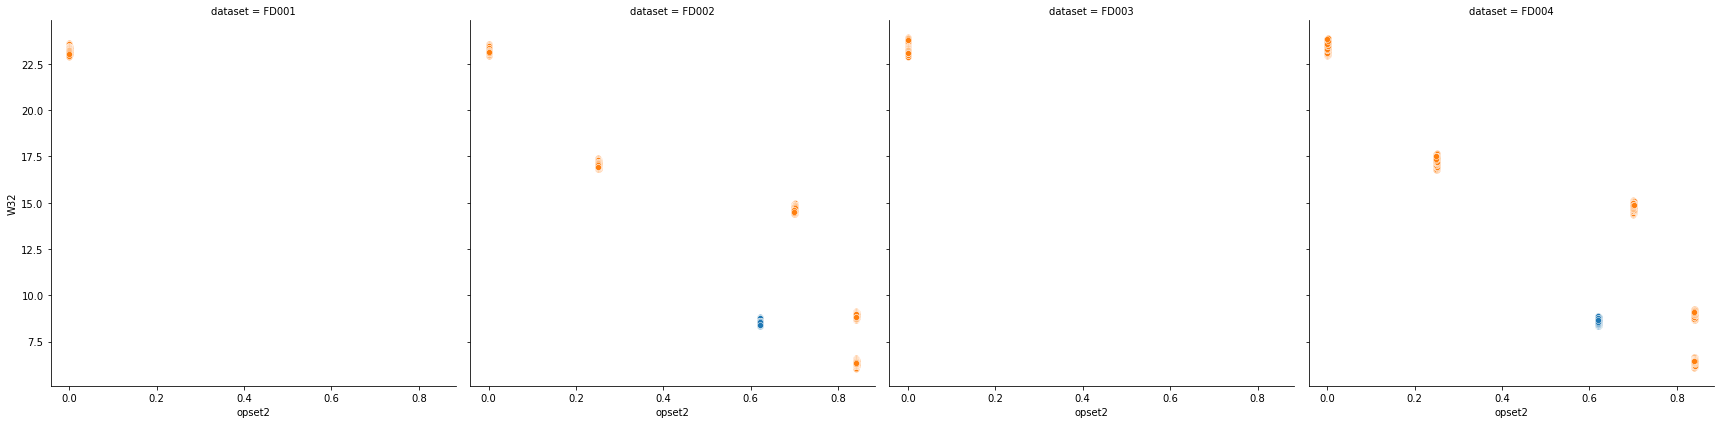

In [131]:

for sensor in sensors:    
    g = sns.FacetGrid(data = train, col = "dataset", hue= "TRA",size=6)
    g.map(sns.scatterplot, "opset2", sensor)
    plt.show()

Brak wytłumaczenia zmienności sensorów przez opset1 oraz opset2 oraz opset w obrębie klastrów

In [132]:
#kategoryzacja opset1 do 6 poziomów
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(train[["opset1","opset2"]].to_numpy())


In [133]:
kmeans.labels_

array([2, 2, 2, ..., 2, 1, 4])

In [134]:
train["condition"] = kmeans.labels_

In [135]:
train.head()

esn  cycles  opset1  opset2   TRA     T2    T24      T30      T50    P2  \
0    1       2  0.0019 -0.0003 100.0 518.67 642.15 1,591.82 1,403.14 14.62   
1    1       3 -0.0043  0.0003 100.0 518.67 642.35 1,587.99  1,404.2 14.62   
2    1       4  0.0007     0.0 100.0 518.67 642.35 1,582.79 1,401.87 14.62   
3    1       5 -0.0019 -0.0002 100.0 518.67 642.37 1,582.85 1,406.22 14.62   
4    1       6 -0.0043 -0.0001 100.0 518.67  642.1 1,584.47 1,398.37 14.62   

    P15    P30       Nf       Nc  epr  Ps30    phi      NRf      NRc    BPR  \
0 21.61 553.75 2,388.04 9,044.07  1.3 47.49 522.28 2,388.07 8,131.49 8.4318   
1 21.61 554.26 2,388.08 9,052.94  1.3 47.27 522.42 2,388.03 8,133.23 8.4178   
2 21.61 554.45 2,388.11 9,049.48  1.3 47.13 522.86 2,388.08 8,133.83 8.3682   
3 21.61  554.0 2,388.06 9,055.15  1.3 47.28 522.19 2,388.04  8,133.8 8.4294   
4 21.61 554.67 2,388.02 9,049.68  1.3 47.16 521.68 2,388.03 8,132.85 8.4108   

   farB  htBleed  Nf_dmd  PCNfR_dmd   W31     W32 dataset  max_cycles  \
0  0.03      392    2388      100.0  39.0 23.4236   FD001         192   
1  0.03      390    2388      100.0 38.95 23.3442   FD001         192   
2  0.03      392    2388      100.0 38.88 23.3739   FD001         192   
3  0.03      393    2388      100.0  38.9 23.4044   FD001         192   
4  0.03      391    2388      100.0 38.98 23.3669   FD001         192   

   rem_cycles  condition  
0        -190          2  
1        -189          2  
2        -188          2  
3        -187          2  
4        -186          2

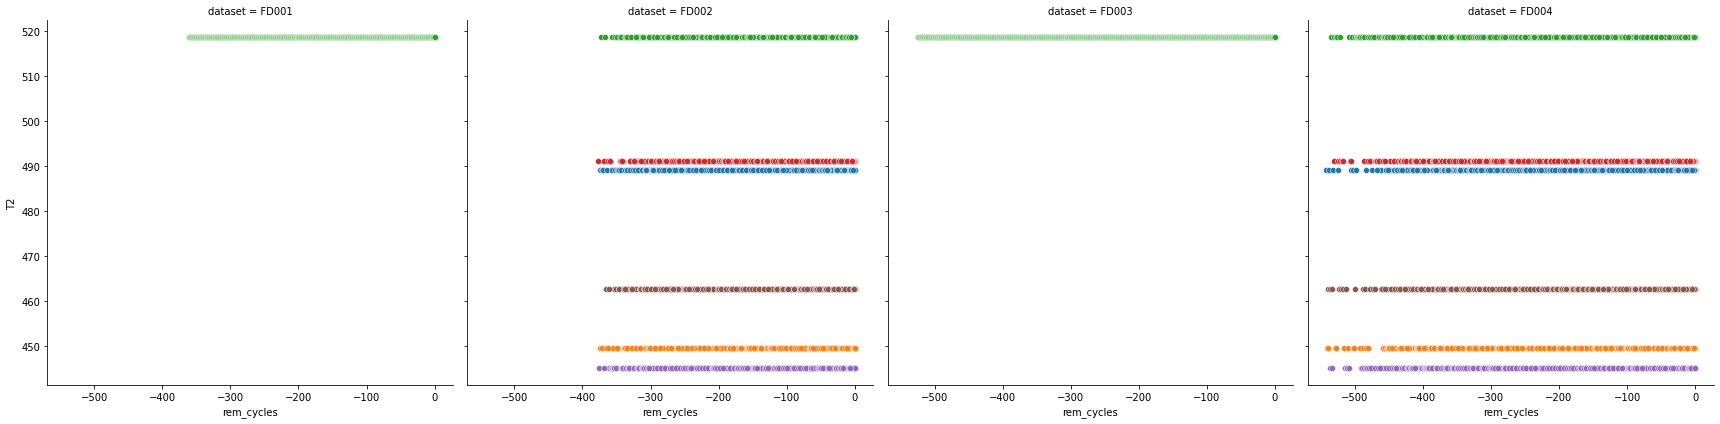

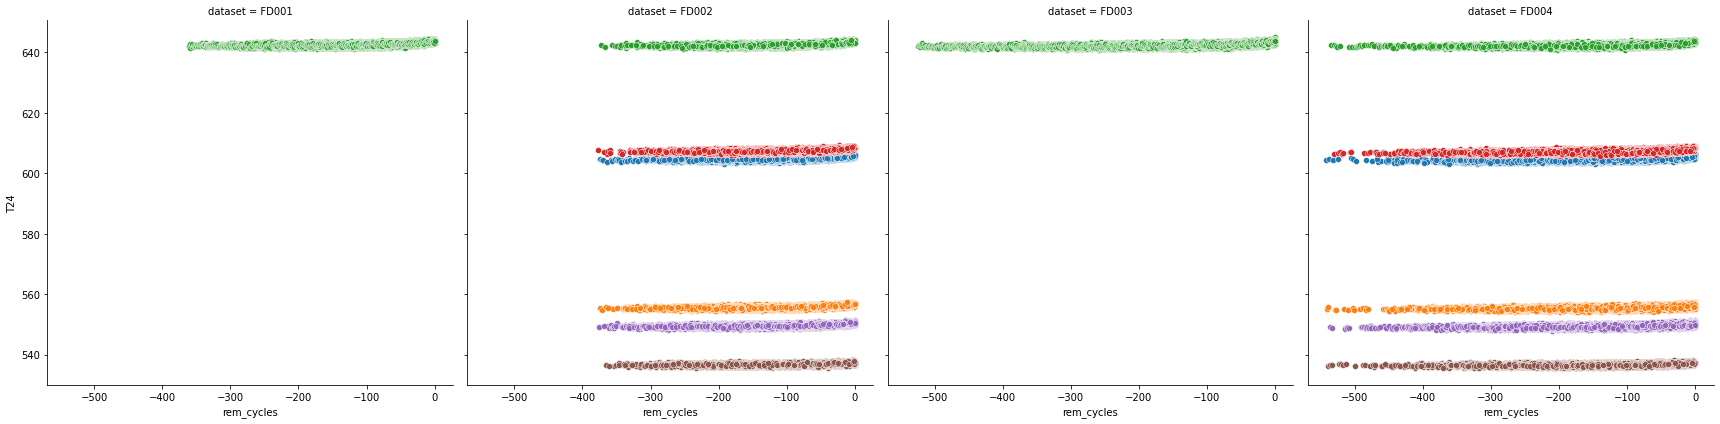

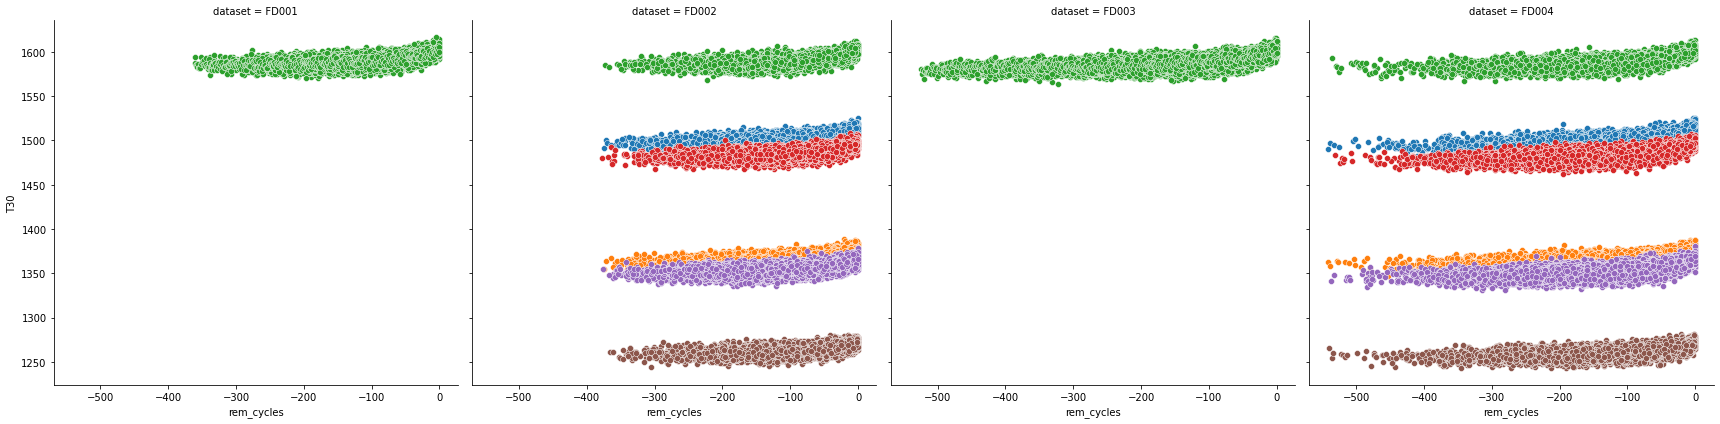

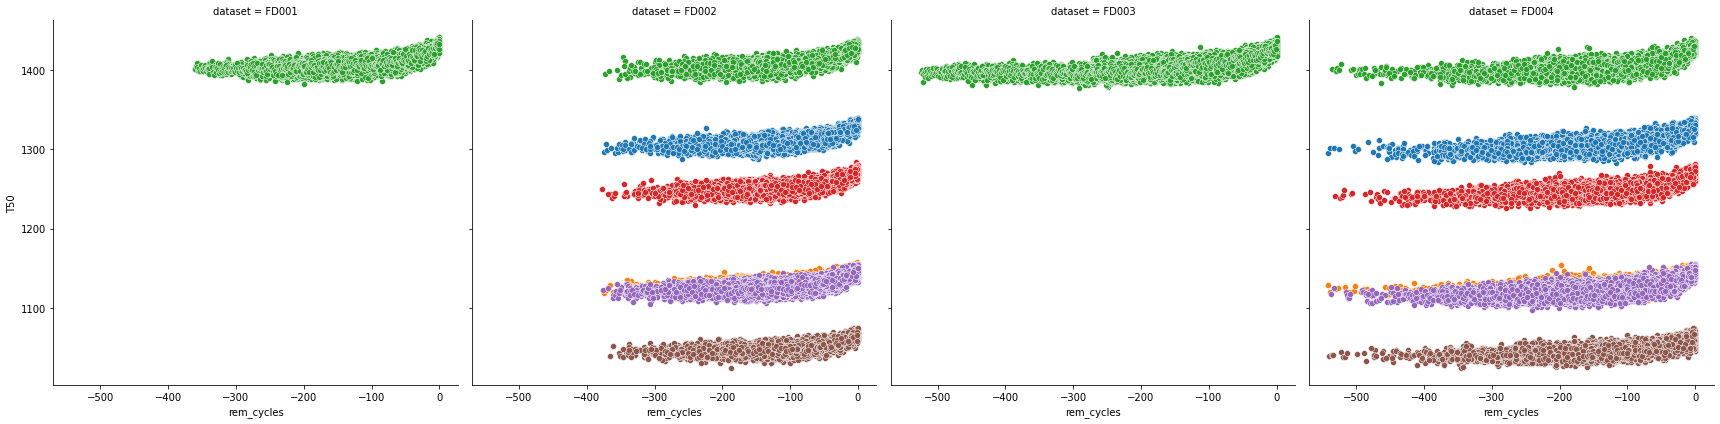

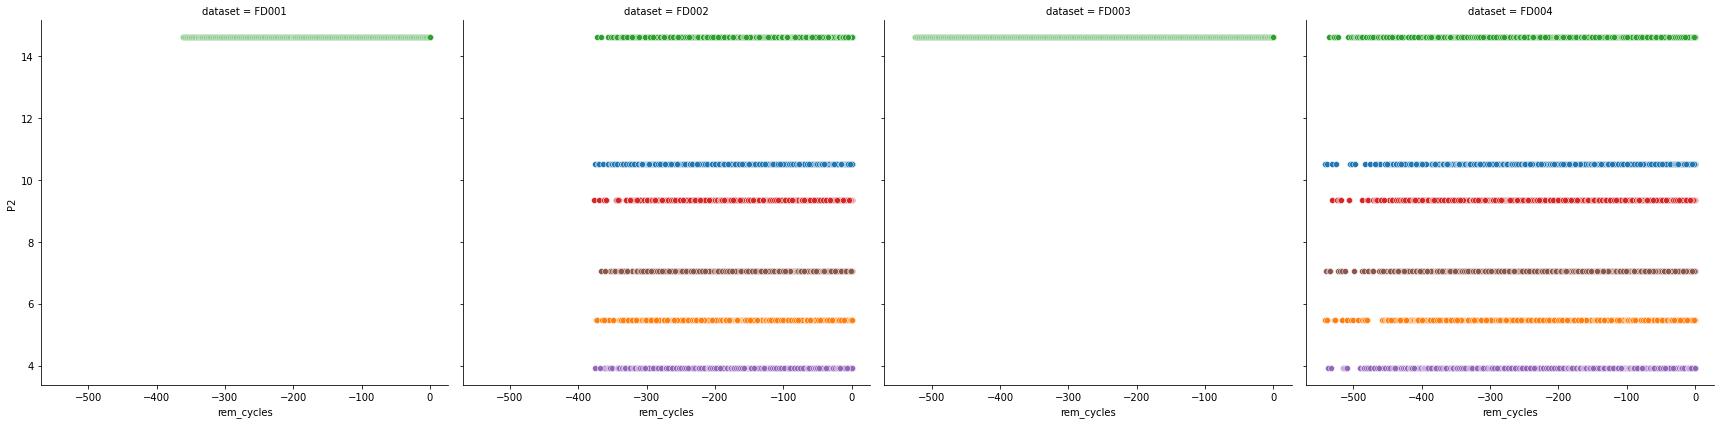

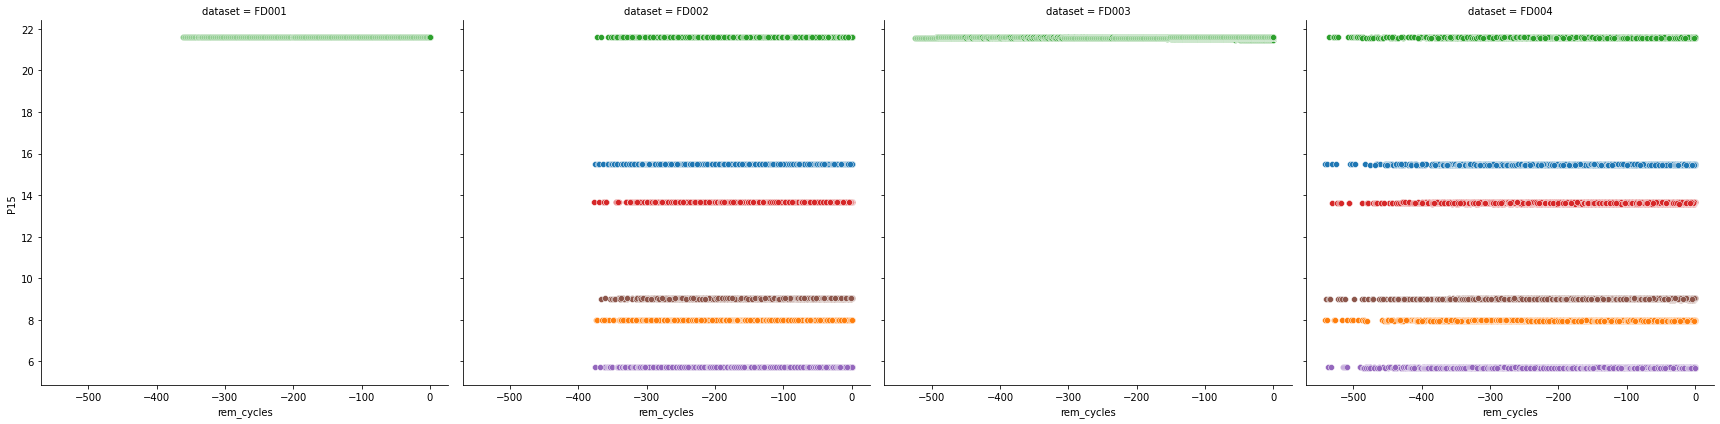

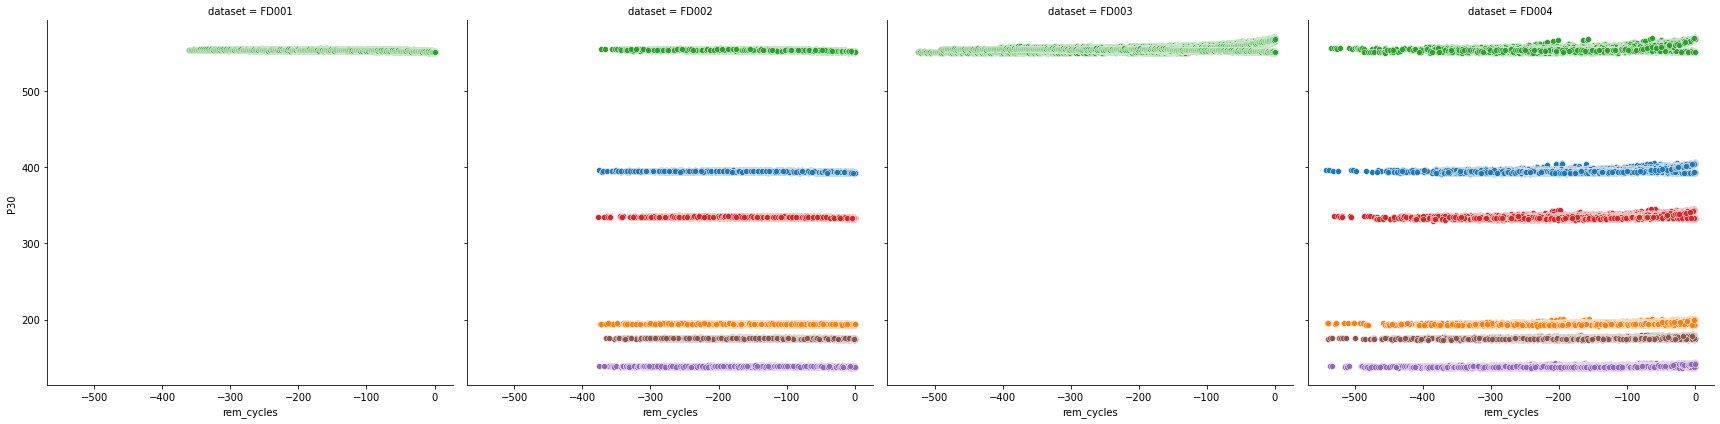

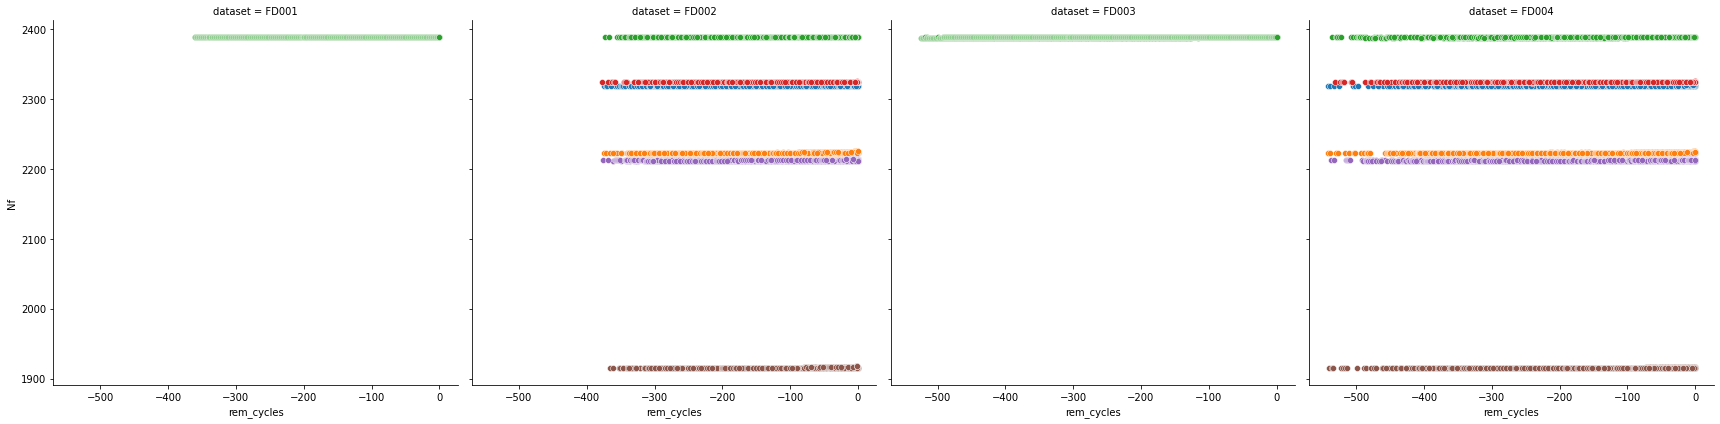

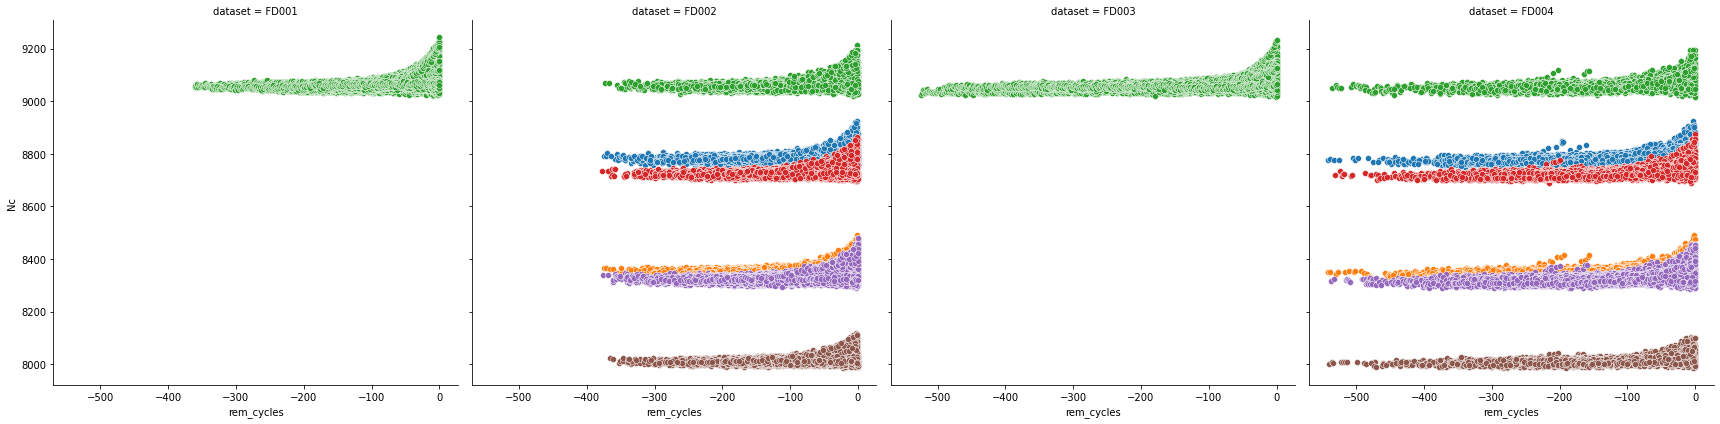

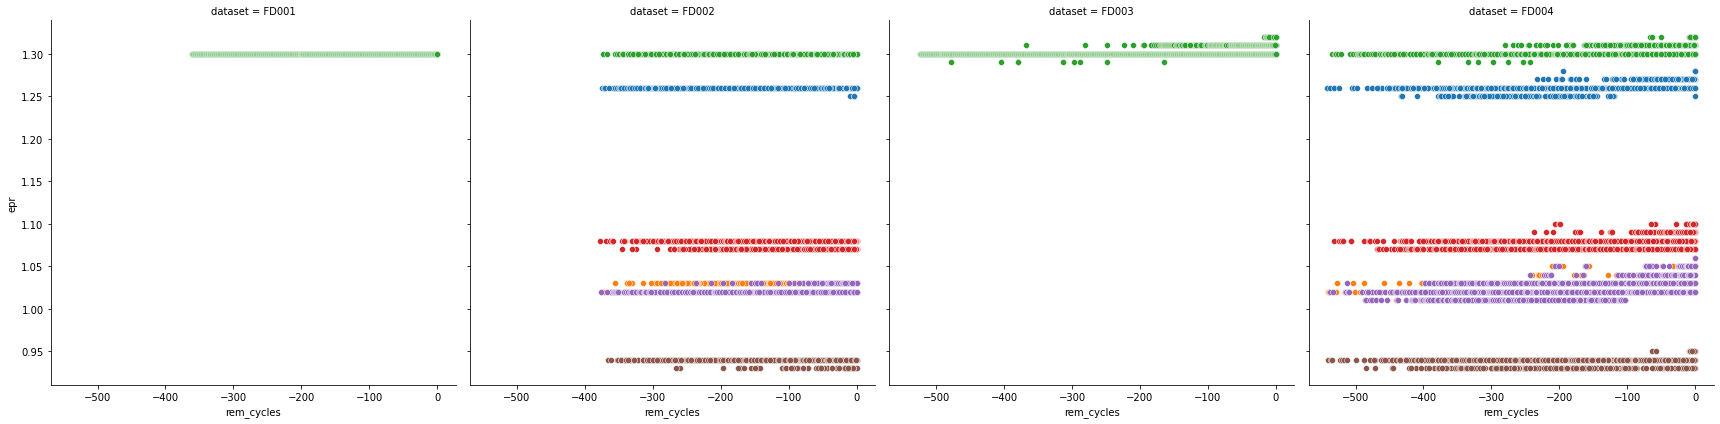

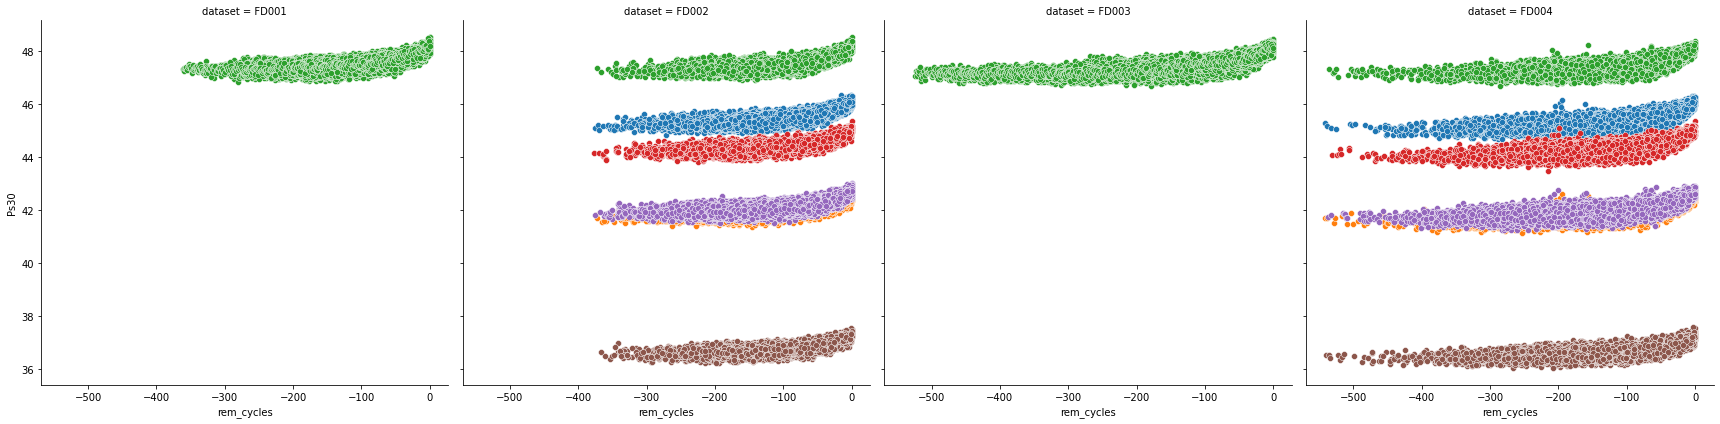

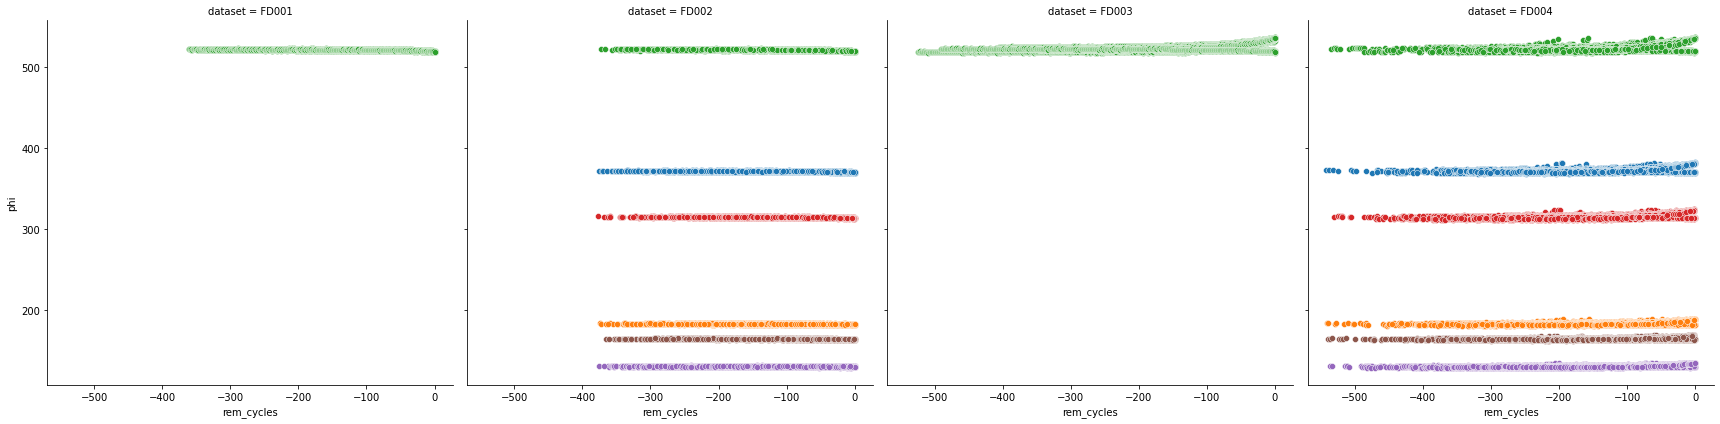

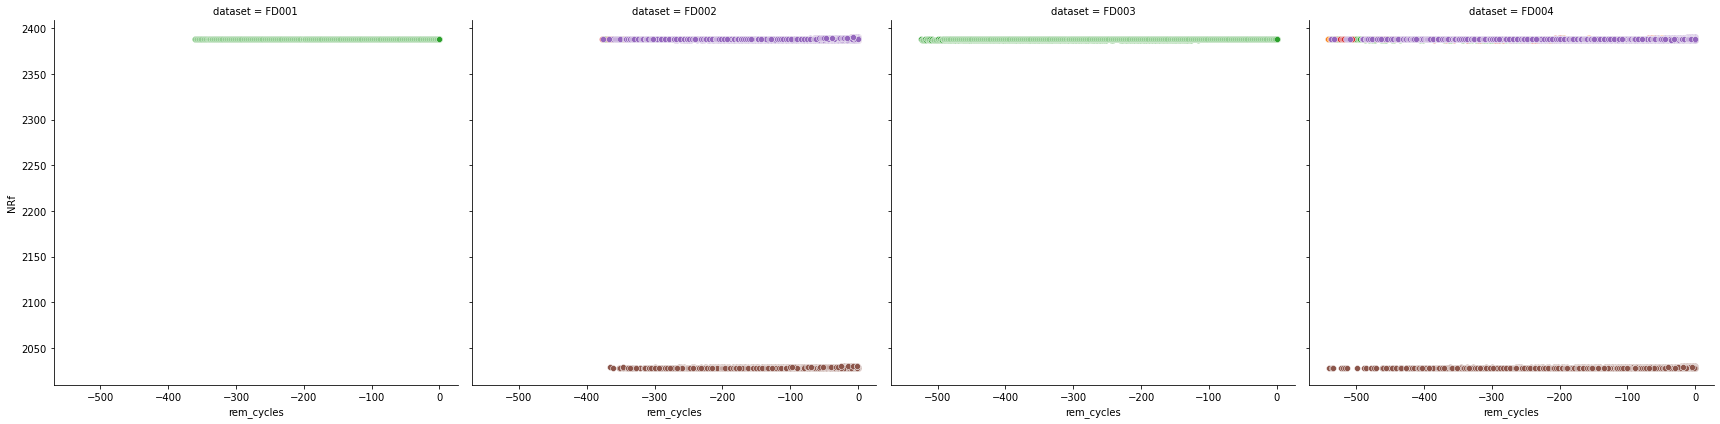

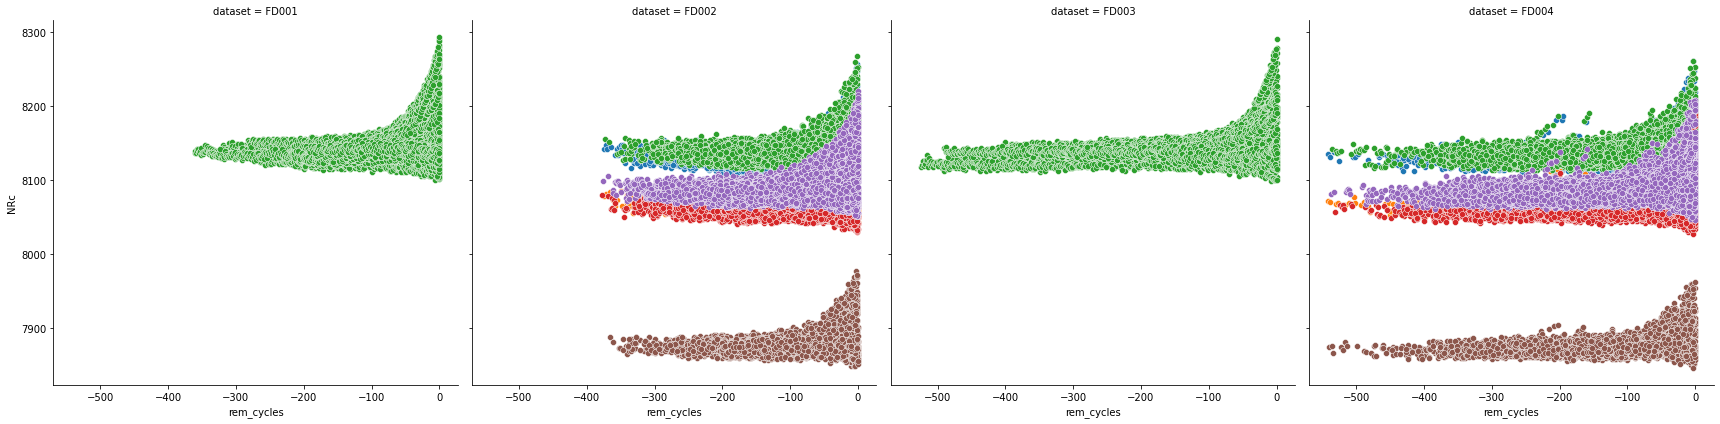

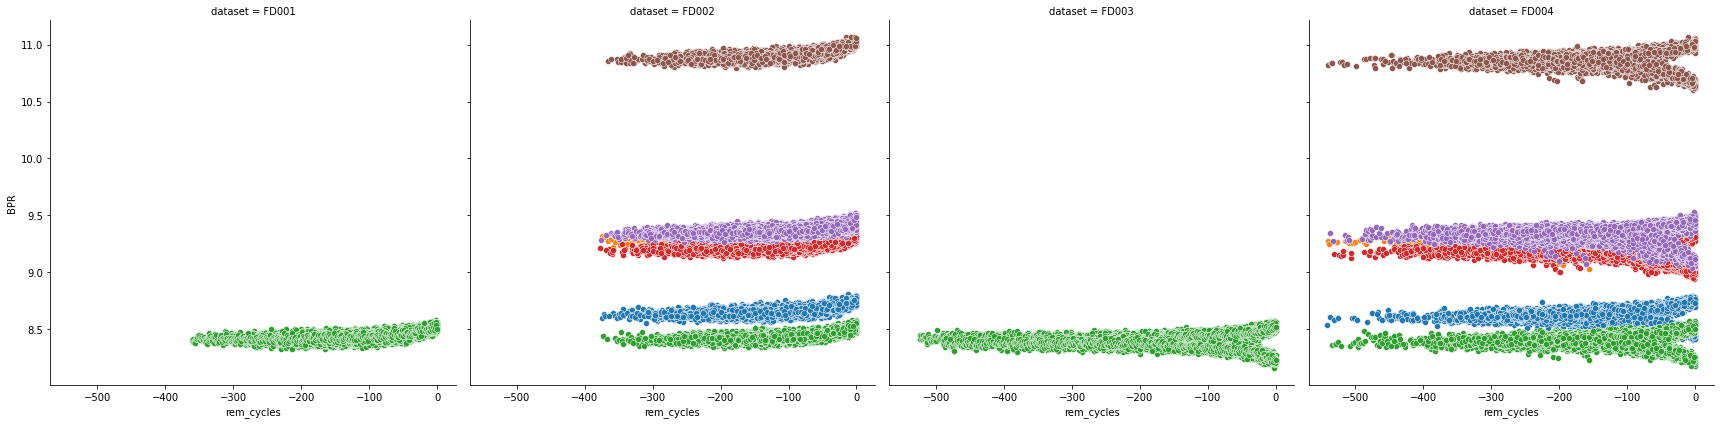

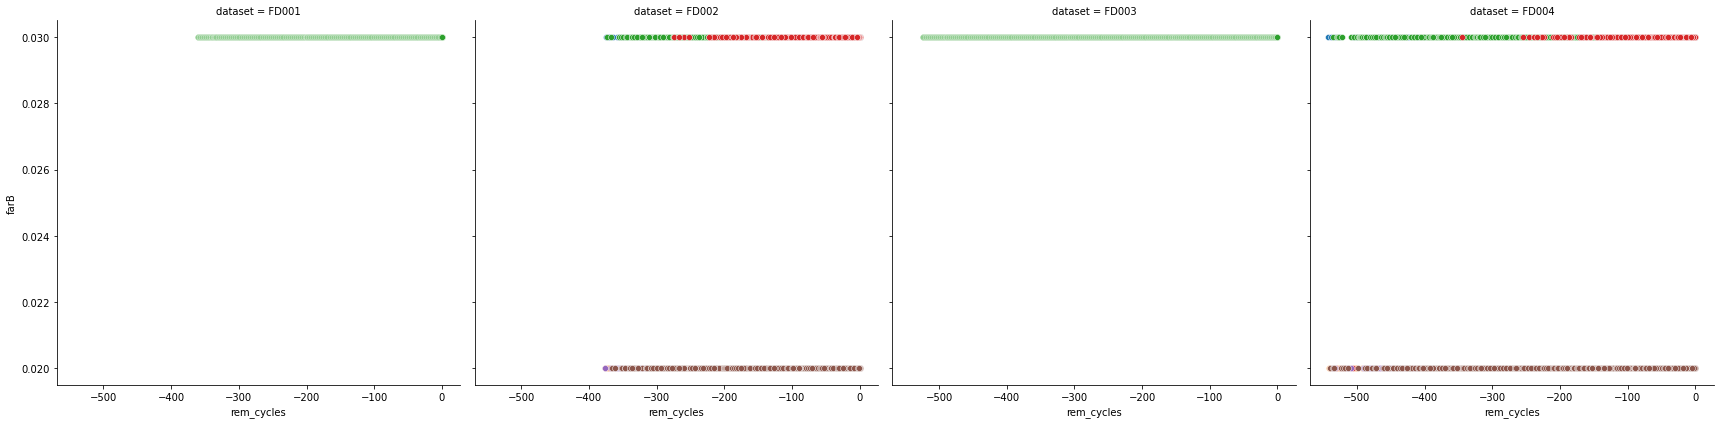

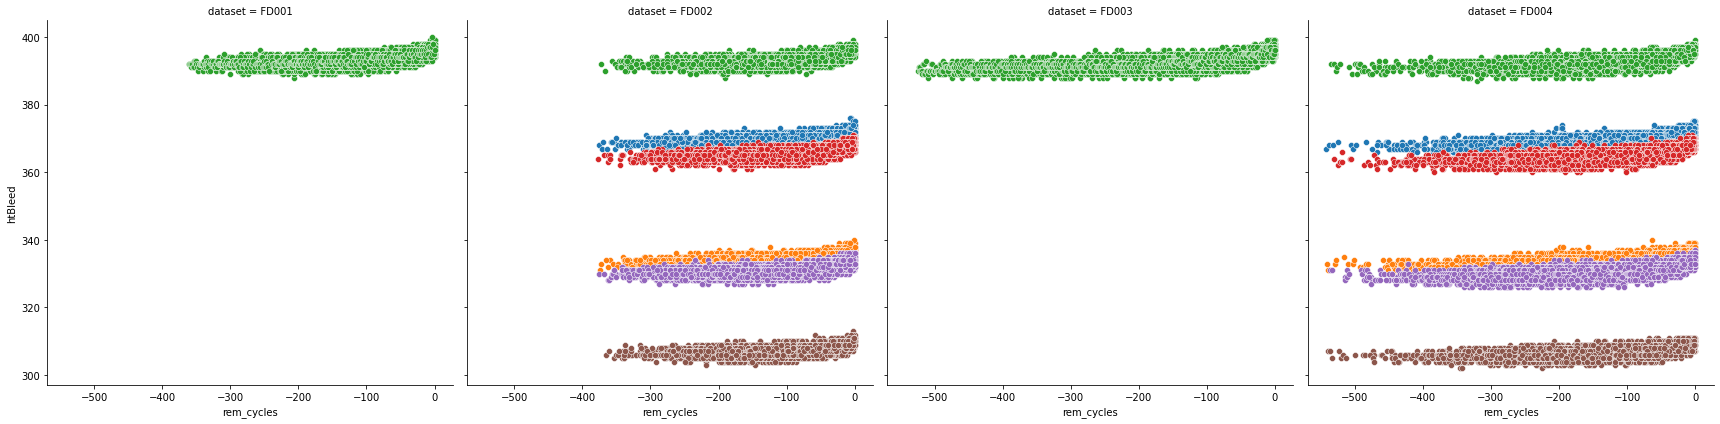

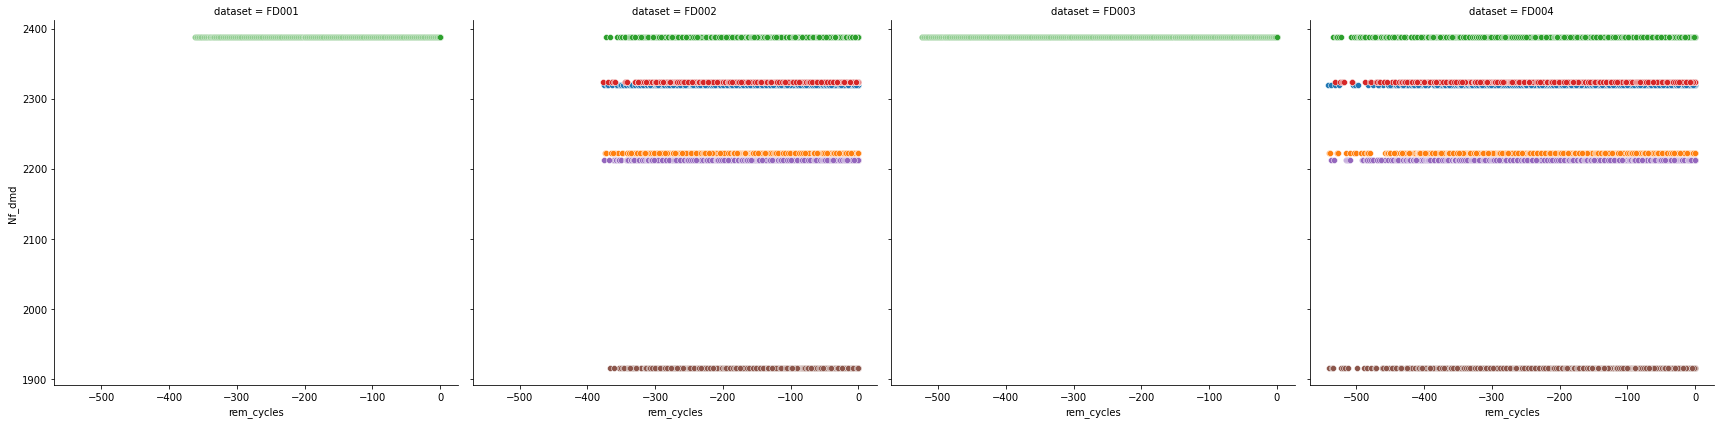

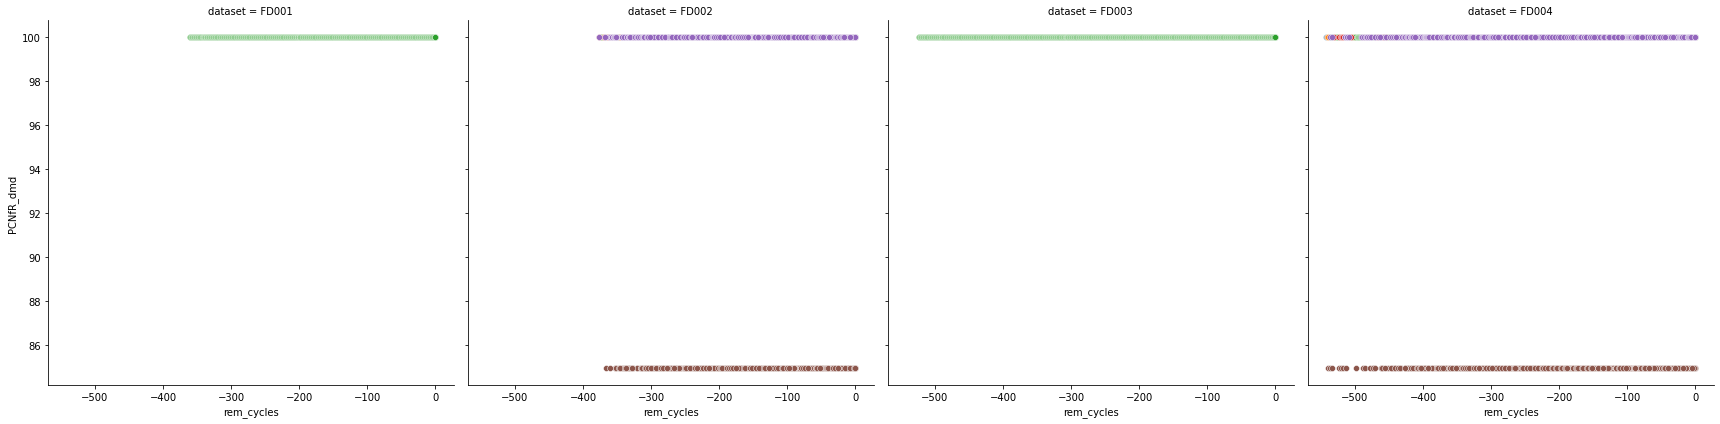

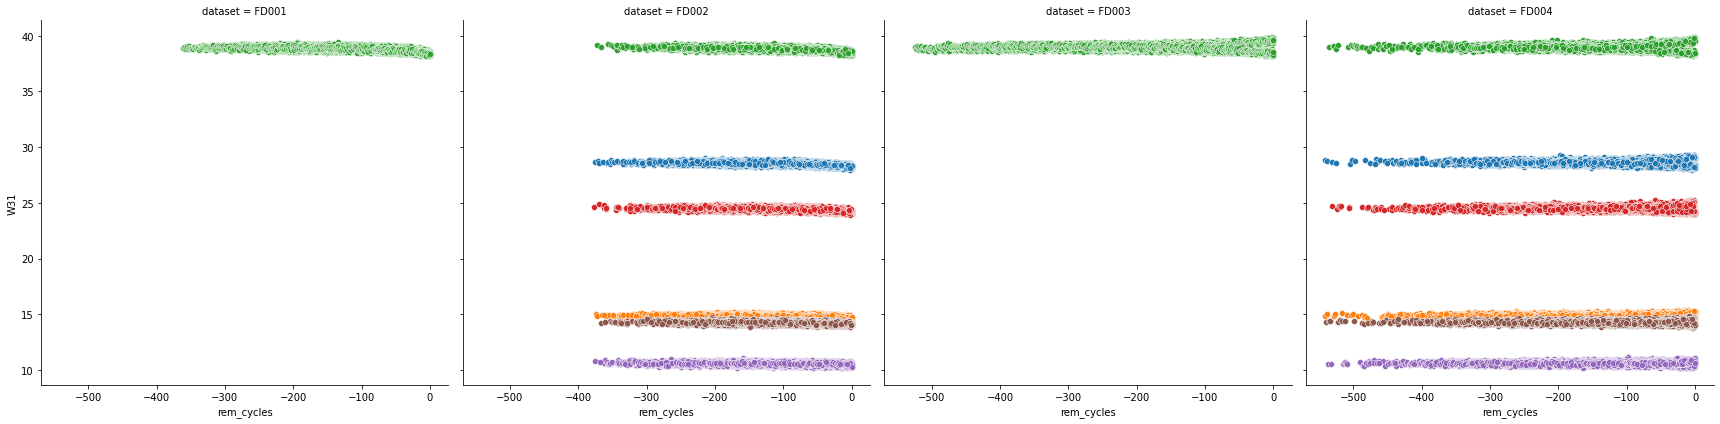

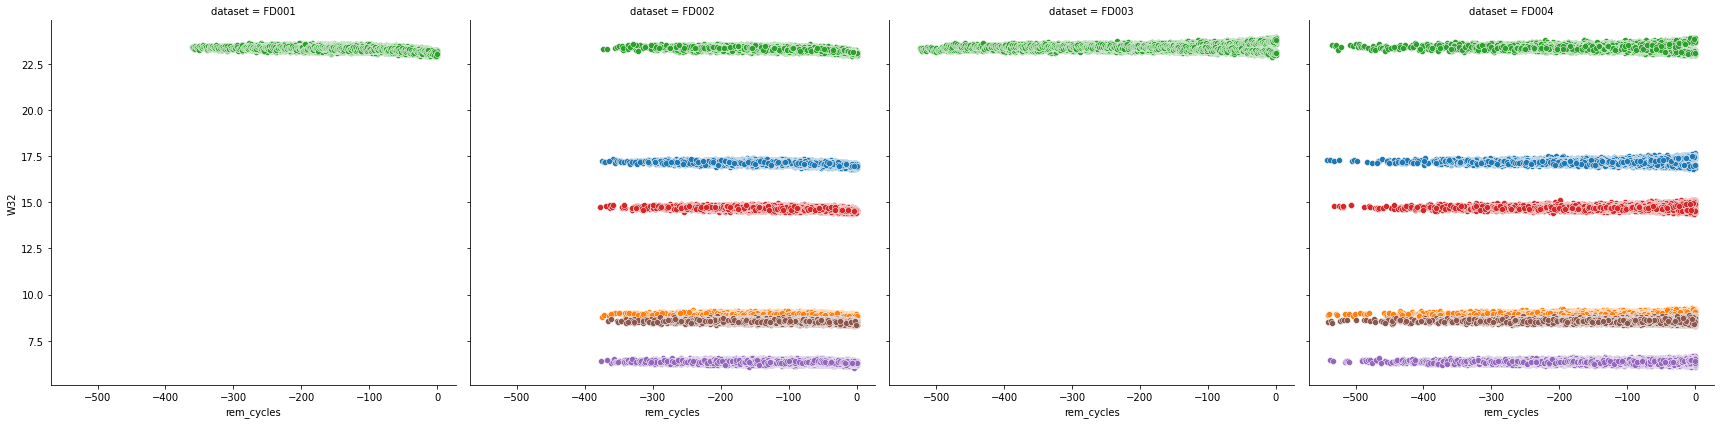

In [136]:

for sensor in sensors:    
    g = sns.FacetGrid(data = train, col = "dataset", hue= "condition",size=6)
    g.map(sns.scatterplot, "rem_cycles", sensor)
    plt.show()

1. Pierwszy krok do modelu diagnostycznego
2. Feature Engineering >> Klastry na operational parameters
3. Zweryfikowano, że klastry tłumaczą zmienność między zgęstkami (klastrami) odczytów

# Diagnostyka

Flaga 0 - 1 na RUL powyżej 100 cykli do teraz lub parametr analizy : Lead Time
Klasyfikacja na to.


In [137]:
lead_time = 100